<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/007_superstore_Profit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Summary of Profits Analysis**


#### **Overall Profit Trends**
- **Strong Growth**: Profits and sales have steadily increased, peaking in 2017 with over **\$101,000 in sales and \$26,000 in profits.** Orders and quantities have nearly doubled over four years.
- **Stable Margins**: Profit margins consistently hover around 30%, with a profitability ratio of 48–49%, indicating effective cost control and pricing strategies.
- **Controlled Discounts**: Average discounts remained steady (~8%), contributing to sustained margins and customer retention.

#### **Regional Insights**
- **Top Performers**: The West and East regions lead profits, contributing a combined total of nearly $50,000.
  - **West**: The highest sales and profits, but higher costs reflect room for cost efficiency improvements.
  - **East**: Strong profitability ratios (50.74%) and margins (31.14%), highlighting effective operations.
- **Underperformers**:
  - **South**: Lowest market share (17.05%) and profitability ratio (45.30%). Needs growth-focused strategies.
  - **Central**: High discount rates (~10%) negatively impact profit margins.

#### **Category Analysis**
- **Top Category**: Office Supplies leads in profits \$45,086 and profit margins (33.35%), driven by sub-categories like Paper and Binders.
- **Challenges**:
  - **Furniture**: Lowest profit margins (24.49%), indicating potential cost or pricing inefficiencies.
  - **Technology**: High sales ($83,613) but low profitability (22.18%), possibly due to high discounts (~9.23%).

#### **Sub-Category Insights**
- **Top Performers**:
  - **Paper**: Highest profit \$16,285, with exceptional margins (42.35%) and profitability ratio (75.59%).
  - **Furnishings**: Strong profitability ratio (45.75%) and significant contributions from the East and West regions.
- **Underperformers**:
  - **Tables**: Low profit \$632 despite significant costs.
  - **Copiers**: Minimal profit ($89) and limited market share, needing reevaluation.
- **Opportunities**:
  - Sub-categories like Binders, Envelopes, and Labels show high efficiency and profitability, making them ideal for scaling.

#### **Segment Analysis**
- **Consumers Drive Profits**: The Consumer segment accounts for the largest share of sales and profits \$40,109.
- **Efficiency in Home Office**: Despite lower sales, Home Office has the highest profitability metrics (51.18%).
- **Corporate Stability**: Moderate profits ($21,673) but higher discounts (8.37%) suggest room for margin improvement.

#### **Strategic Recommendations**
1. **Focus on Top Performers**: Scale high-performing sub-categories like Paper, Furnishings, and Binders. Replicate strategies from successful regions like the West and East.
2. **Expand Market Share**: Invest in the South and Central regions, targeting discount optimization and market penetration.
3. **Optimize Costs**: Reduce inefficiencies in Technology (Phones, Accessories) and Furniture (Tables) to boost profitability.
4. **Leverage High Efficiency**: Scale sub-categories with strong margins, such as Labels and Envelopes, while addressing cost inefficiencies in Storage.
5. **Refine Discounts**: Reassess discount strategies in regions and segments to balance volume and margins.





### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


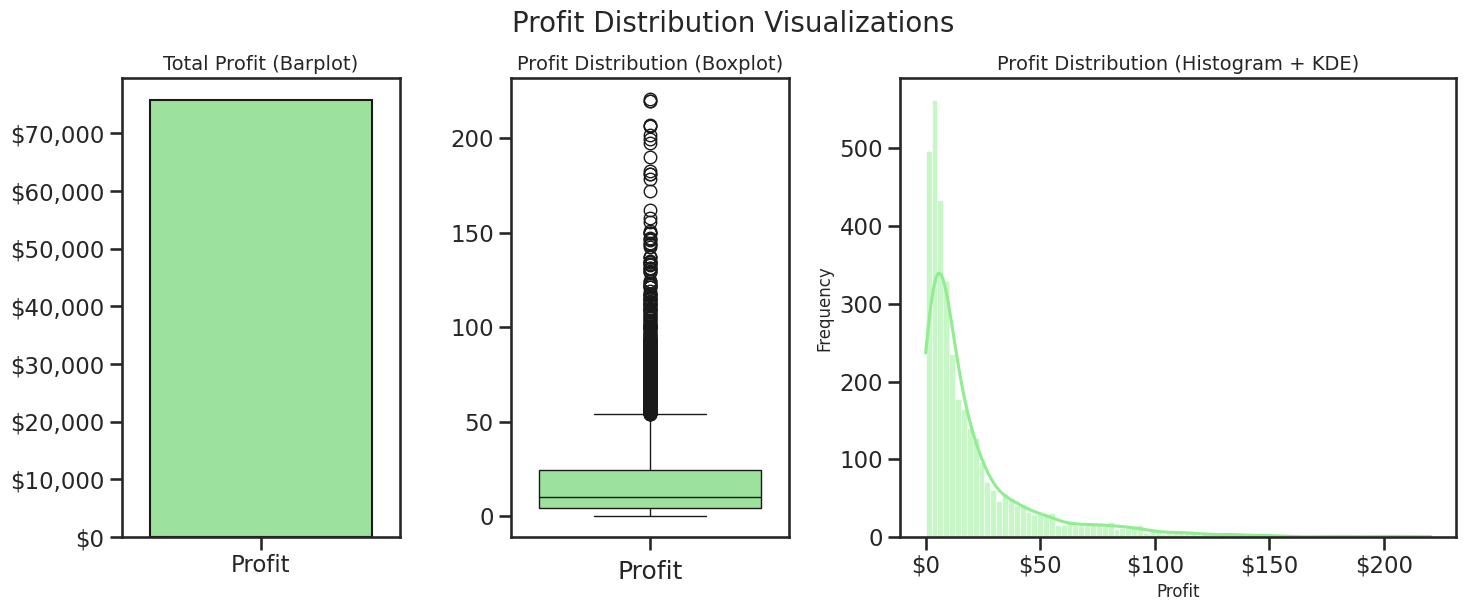

In [3]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

## Profit by Year




In [4]:
df = data_profits.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])

# Display the results
print("\nSummary Table for Profits by Year:")
table_profits


Summary Table for Profits by Year:


,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,13437.7489,30.011673,48.669828,43471.6401,56909.3890,0.083809,5015,2501,26.658557
1,2015,16032.2799,30.069466,48.709276,47086.9201,63119.2000,0.078638,5489,2700,26.711609
2,2016,19961.2777,29.957379,48.383934,60555.8388,80517.1165,0.082070,6962,3412,26.764110
3,2017,26347.6739,30.492501,49.490443,74782.1741,101129.8480,0.080513,9069,4496,26.688082


### **Profit Analysis**
1. **Strong Growth**:
   - Profits and sales increased significantly from 2014 to 2017, with sales reaching over **\$101,000** and profits exceeding **\$26,000** in 2017.
   - Orders and quantities nearly doubled over the four years, reflecting growing customer demand.

2. **Stable Profitability**:
   - Profit margins consistently hovered around **30%**, and profitability ratios remained close to **48–49%**, indicating effective cost control and pricing strategies.

3. **Controlled Discounts**:
   - Average discounts remained steady around **8%**, supporting stable margins while likely driving customer retention and sales.

4. **Regional Market Share Consistency**:
   - Market share remained stable at **~26.7%**, showing consistent performance across regions but limited growth in penetration.

Figure saved as /content/profit_by_year.png


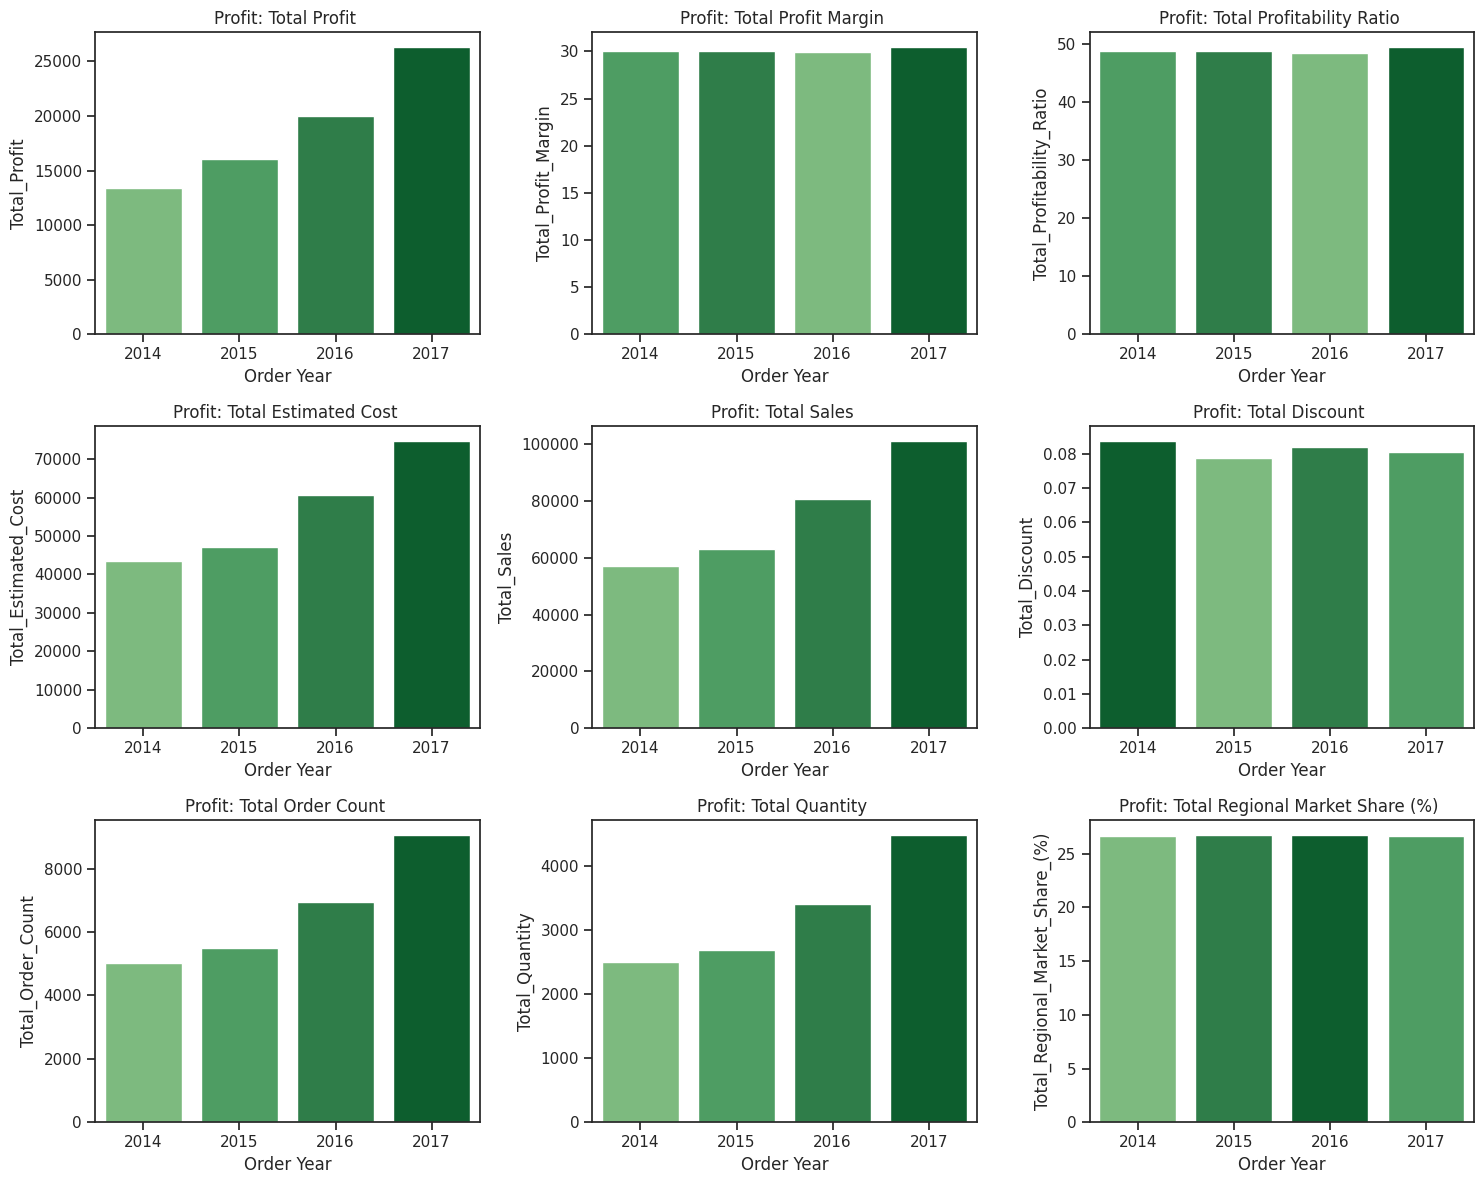

In [9]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Profit_Margin',
    'Total_Profitability_Ratio',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Discount',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_year.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=7)[3:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=profit_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


## Region


In [10]:
# Use the aggregate function to calculate metrics for each region
table_region = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region'])

# Display the results
print("\nSummary Table for Profits by Region:")
table_region


Summary Table for Profits by Region:


,Region,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,14736.6315,29.835312,48.151992,44136.5945,58873.2260,0.103419,5091,2563,21.819594
1,East,22659.0907,31.135400,50.742987,59237.5033,81896.5940,0.074099,7518,3691,29.548188
2,South,12065.2353,28.368333,45.304797,38607.5727,50672.8080,0.088667,4412,2164,17.052140
3,West,26318.0229,30.428596,49.461080,83914.9026,110232.9255,0.071213,9514,4691,31.580078


### **Regional Profit Analysis**

1. **Top-Performing Regions**:
   - **West** leads in overall profits with **\$26,318.02**, followed closely by the **East** with **\$22,659.09**.
   - These regions account for the majority of total profits and sales.

2. **Profit Margins**:
   - **East** has the highest profit margin at **31.14%**, indicating better efficiency in converting sales into profit.
   - **South** has the lowest profit margin at **28.37%**, suggesting potential room for improvement in cost management or pricing strategies.

3. **Profitability Ratio**:
   - **East** also leads with the highest profitability ratio at **50.74%**, showing strong cost efficiency.
   - **South** has the lowest profitability ratio at **45.30%**, further indicating lower cost-to-profit efficiency.

4. **Estimated Costs and Sales**:
   - **West** has the highest sales (**\$110,232.93**) and costs (**83,914.90**), highlighting its dominance in volume.
   - **South** has the lowest sales (**\$50,672.81**) and costs (**\$38,607.57**), reflecting its smaller market size.

5. **Regional Market Share**:
   - **East** has the largest regional market share at **29.55%**, followed by the **West** at **26.68%**.
   - **South** has the smallest share at **17.05%**, indicating potential for growth.

6. **Discounts**:
   - **Central** has the highest average discount rate (**10.34%**), which might contribute to its lower overall profits.
   - **West** has the lowest discount rate (**7.12%**), helping maintain its profitability.

7. **Order Count and Quantity**:
   - **East** leads in order count (**7,518**) and quantity sold (**3,691**), indicating high customer activity.
   - **South** trails with the lowest order count (**4,412**) and quantity sold (**2,164**), highlighting its smaller scale.

---

### **Actionable Insights**:
1. **Focus on the South Region**:
   - Investigate ways to improve profit margins and profitability ratios in the South.
   - Explore strategies to increase sales and expand market share.

2. **Optimize Discounts in Central**:
   - Reassess discount strategies in the Central region to boost profit margins without losing customer activity.

3. **Leverage Strengths in East and West**:
   - Continue investing in East and West regions, which drive the most profit and sales.
   - Use successful practices from these regions to improve performance in Central and South.


Figure saved as /content/profit_by_region.png


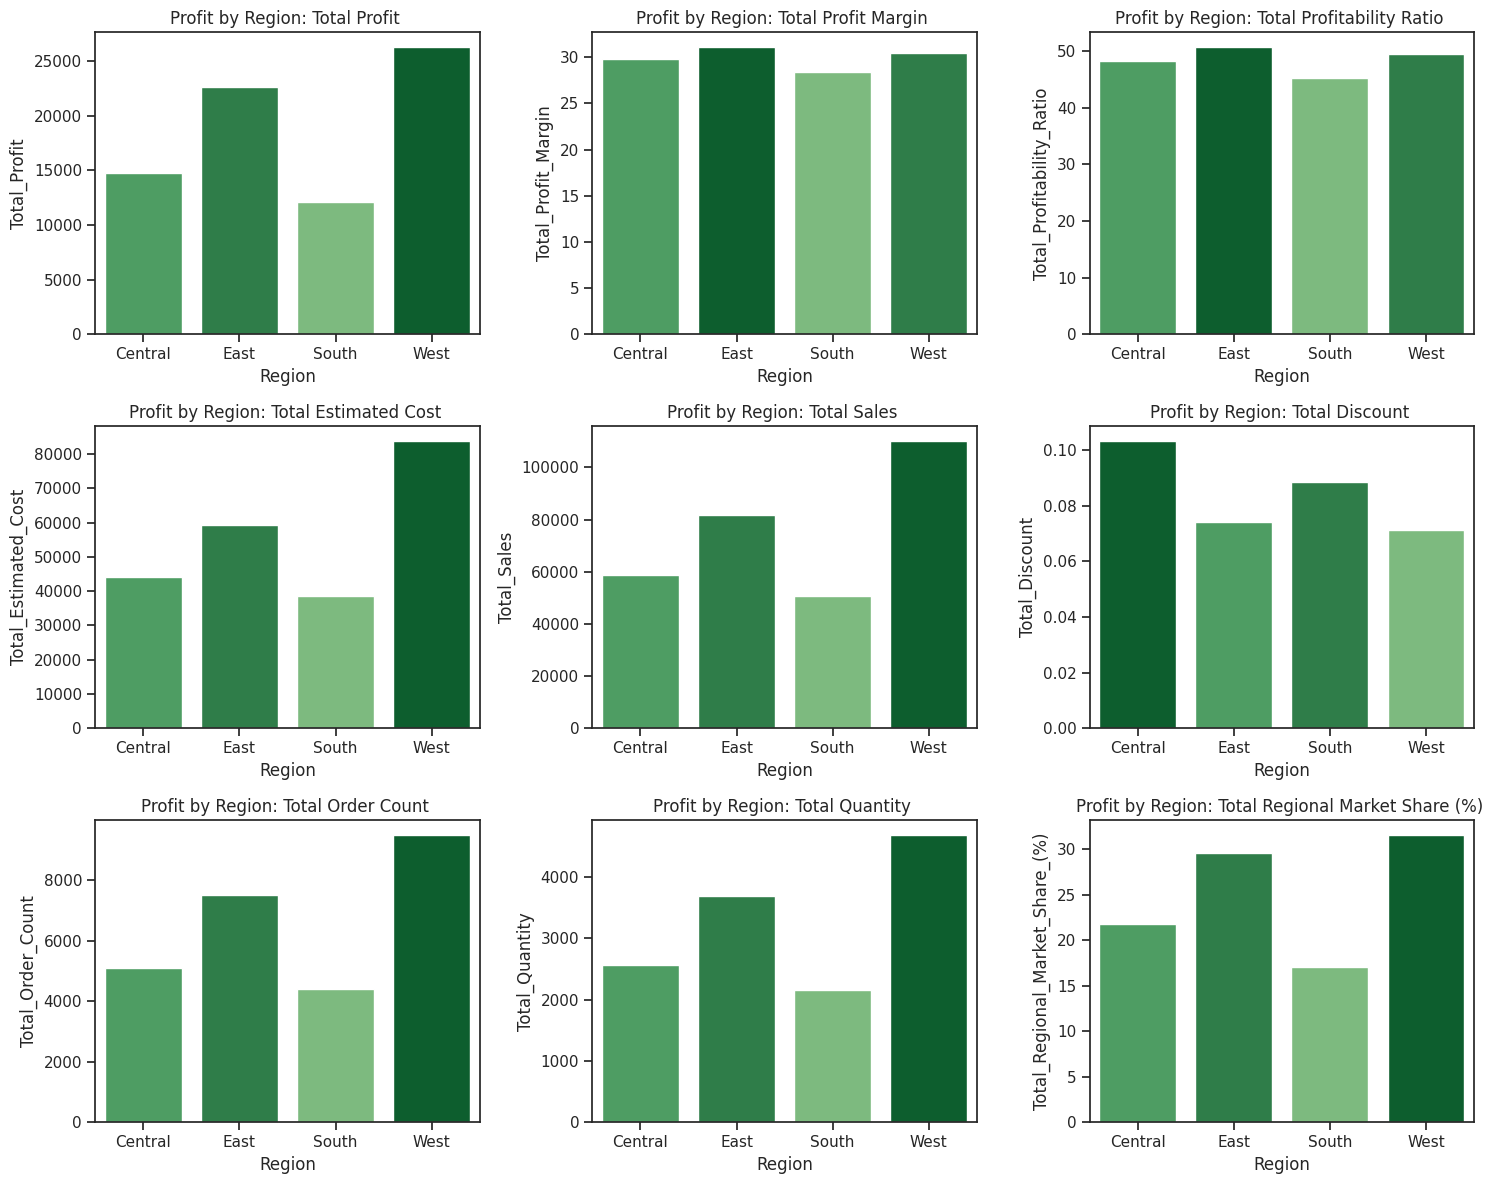

In [11]:

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=7)[3:]  # Select the darker shades

# Visualize the metrics by Region
dvu.plot_metrics_grid(
    data1=table_region,
    metrics=metrics,
    group_by_column='Region',
    title_prefix="Profit by Region: ",
    palette=profit_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Region & State

In [12]:
# Use the aggregate function to calculate metrics by Region and State
table_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])

# Sort the data within each region by Total Profit in descending order
table_region_state_sorted = table_region_state.sort_values(['Region', 'Total_Profit'], ascending=[True, False])

# Select the top 5 states per region
top_states_by_region = table_region_state_sorted.groupby('Region', observed=False).head(5).reset_index(drop=True)

# Display the results
print("\nTop 7 States by Total Profit for Each Region:")
top_states_by_region


Top 7 States by Total Profit for Each Region:


,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Texas,3498.6704,24.159664,35.008009,14070.8936,17569.5640,0.200420,1722,847,21.819594
1,Central,Michigan,2934.3132,36.280093,62.414448,6758.4548,9692.7680,0.004167,721,342,21.819594
2,Central,Indiana,1778.1835,35.048387,60.043223,4406.9765,6185.1600,0.000000,441,238,21.819594
3,Central,Illinois,1744.1495,22.766393,32.661684,8211.6745,9955.8240,0.200820,881,464,21.819594
4,Central,Wisconsin,1487.3145,34.333333,58.493201,3407.2455,4894.5600,0.000000,311,166,21.819594
5,East,New York,11470.9232,33.545669,55.878276,29563.8108,41034.7340,0.041949,3415,1691,29.548188
6,East,Massachusetts,1784.9824,35.678571,60.717467,3528.3976,5313.3800,0.000000,407,198,29.548188
7,East,Pennsylvania,1546.5357,22.691886,32.289665,7105.5923,8652.1280,0.203289,1114,539,29.548188
8,East,Delaware,1490.6015,33.925000,56.774723,3081.8085,4572.4100,0.000000,290,141,29.548188
9,East,New Jersey,1412.6278,32.566038,55.333502,3299.9522,4712.5800,0.000000,391,178,29.548188


### Region & State Analysis

#### 1. **Central Region**
- **Key State**: **Texas** leads with a **Total Profit of \$3,498.67**, contributing significantly to the region's profitability.
- **Other Top States**: Michigan, Indiana, Illinois, and Wisconsin also contribute positively but with lower profit margins.
- **Insights**:
  - Texas accounts for the largest profit and a relatively high number of orders (**1,722**) and quantities sold (**847**).
  - Wisconsin and Indiana have relatively high **Profit Margins** (**34%-35%**), indicating efficiency in their sales operations.
  - Illinois, despite a moderate profit, has a higher **Estimated Cost** (**$8,211**) compared to other states.

#### 2. **East Region**
- **Key State**: **New York** dominates with an impressive **Total Profit of \$11,470.92**, the highest across all regions.
- **Other Top States**: Massachusetts, Pennsylvania, Delaware, and New Jersey perform well but lag significantly behind New York.
- **Insights**:
  - New York's dominance stems from high **Sales** (**\$41,034**) and a large number of orders (**3,415**).
  - Pennsylvania and New Jersey have relatively high **Estimated Costs**, which may affect their efficiency.
  - Massachusetts and Delaware maintain strong **Profit Margins** (**~33%-35%**), indicating effective cost management.

#### 3. **South Region**
- **Key State**: **Virginia** is the top performer with **Total Profit of $2,621.18** and strong sales.
- **Other Top States**: Georgia, Florida, North Carolina, and Kentucky contribute moderately.
- **Insights**:
  - Virginia and Georgia demonstrate strong profitability with **Profit Margins** above **33%**.
  - Florida and North Carolina show higher **Estimated Costs**, which may impact their profit efficiency.
  - Kentucky, despite being fifth, has a high **Profitability Ratio** (**60.69%**), showcasing efficient cost-to-profit management.

#### 4. **West Region**
- **Key State**: **California** outshines all states with an extraordinary **Total Profit of \$18,288.11**, driven by the highest sales volume across all regions (**\$74,741**).
- **Other Top States**: Washington, Arizona, Colorado, and Oregon contribute to the region’s profitability.
- **Insights**:
  - California not only leads in profit but also handles a high volume of orders (**6,311**) and quantities sold (**3,113**), showcasing robust market dominance.
  - Washington also performs strongly, with over **$4,279.78** in profit and a high **Profit Margin** (**31.40%**).
  - Arizona, Colorado, and Oregon have lower profits and **Estimated Costs** that could be optimized to improve efficiency.

---

### Regional Summary:
1. **New York and California** are standout states, significantly boosting the East and West regions' profitability. Their sales volume, high profits, and efficient order management make them strategic assets.
2. **Texas and Virginia** lead in the Central and South regions but contribute far less than New York and California, highlighting regional disparities.
3. Across regions, states like Illinois, Florida, and Arizona show high **Estimated Costs**, signaling opportunities to improve cost-efficiency and profitability ratios.
4. Smaller states, such as Wisconsin and Kentucky, maintain strong **Profit Margins**, indicating potential to scale operations profitably.

---

### Recommendations:
- **Focus on High-Performing States**: Leverage the success strategies of states like New York and California to replicate in other regions.
- **Optimize Costs**: Target states with high Estimated Costs (e.g., Illinois, Florida, Arizona) to uncover inefficiencies and reduce expenditures.
- **Expand High-Margin States**: Invest in states like Wisconsin, Kentucky, and Massachusetts, which have shown consistent efficiency in converting costs to profits.
- **Enhance Underperformers**: States like Oregon and Colorado, despite contributing positively, have room for growth in both profit and sales.

Figure saved as /content/profit_by_region_state.png


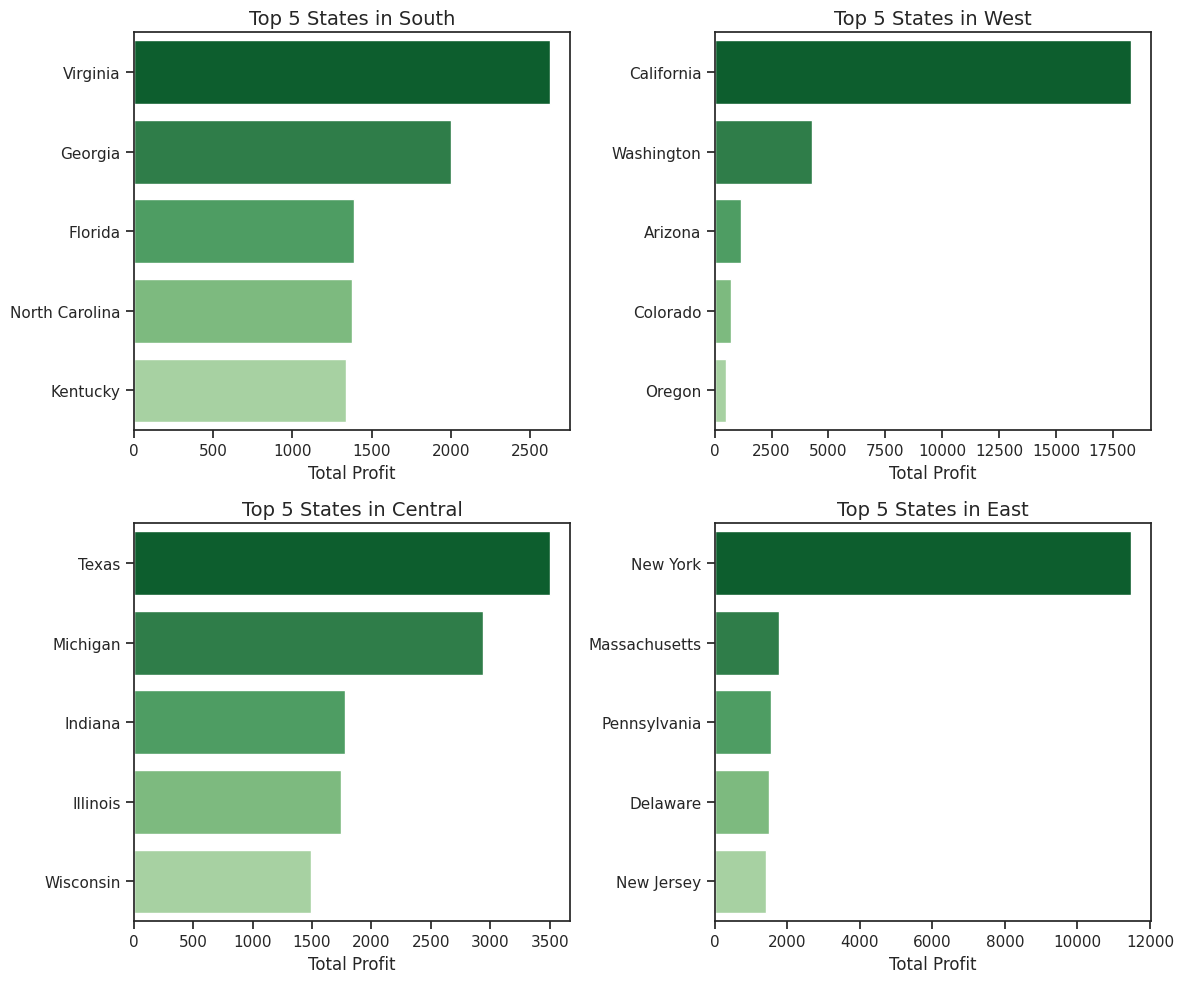

In [14]:
# Define regions for filtering
regions = df['Region'].unique()

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region_state.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=7)[2:]  # Select the darker shades

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

# Plot each region
for i, region in enumerate(regions):
    # Filter top 5 states for the current region
    region_data = top_states_by_region[top_states_by_region['Region'] == region]

    # Plot the data
    sns.barplot(
        data=region_data,
        x='Total_Profit',
        y='State', hue='Total_Profit',
        palette=profit_palette, dodge=False, legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Top 5 States in {region}", fontsize=14)
    axes[i].set_xlabel("Total Profit", fontsize=12)
    # axes[i].set_ylabel("State", fontsize=12)
    axes[i].set_ylabel("", fontsize=12)

# Hide any unused axes (in case there are fewer than 4 regions)
for j in range(len(regions), 4):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
# plt.show()

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


## Segment



In [15]:
# Use the aggregate function to calculate metrics for each segment
table_segment = dpu.calculate_aggregate_metrics(df, group_by_columns=['Segment'])

# Display the results
print("\nSummary Table for Profits by Segment:")
table_segment


Summary Table for Profits by Segment:


,Segment,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Consumer,40109.5703,29.912758,48.355825,121863.8047,161973.3750,0.081274,13591,6727,26.606392
1,Corporate,21673.4505,29.919023,48.371479,64998.2540,86671.7045,0.083654,8228,3942,26.723028
2,Home Office,13995.9596,31.308704,51.178233,39034.5144,53030.4740,0.076791,4716,2440,26.960010


### **Segment Analysis**

1. **Top-Performing Segment**:
   - **Consumer** is the most profitable segment, with a **Total Profit of 40,109.57**, accounting for the largest share of profits and sales.

2. **Highest Profit Margin and Efficiency**:
   - **Home Office** has the highest **Profit Margin (31.31%)** and **Profitability Ratio (51.18%)**, indicating strong cost efficiency.

3. **Corporate Stability**:
   - **Corporate** is stable with moderate profits (**21,673.45**) and consistent profit margins (**29.92%**), closely aligned with the Consumer segment.

4. **Discount Utilization**:
   - **Corporate** has the highest average discount (**8.37%**), which may be driving volume but limiting profit margins.

5. **Opportunities for Home Office**:
   - Despite having the smallest **Total Profit (13,995.96)**, Home Office demonstrates strong profitability metrics, suggesting potential for growth with increased volume.

---

### **Actionable Insights**:
1. Focus on scaling **Home Office** to leverage its strong cost efficiency.
2. Reassess discount strategies for **Corporate** to improve margins.
3. Continue optimizing the **Consumer** segment to maintain its profitability and volume dominance.


Figure saved as /content/profit_by_segment.png


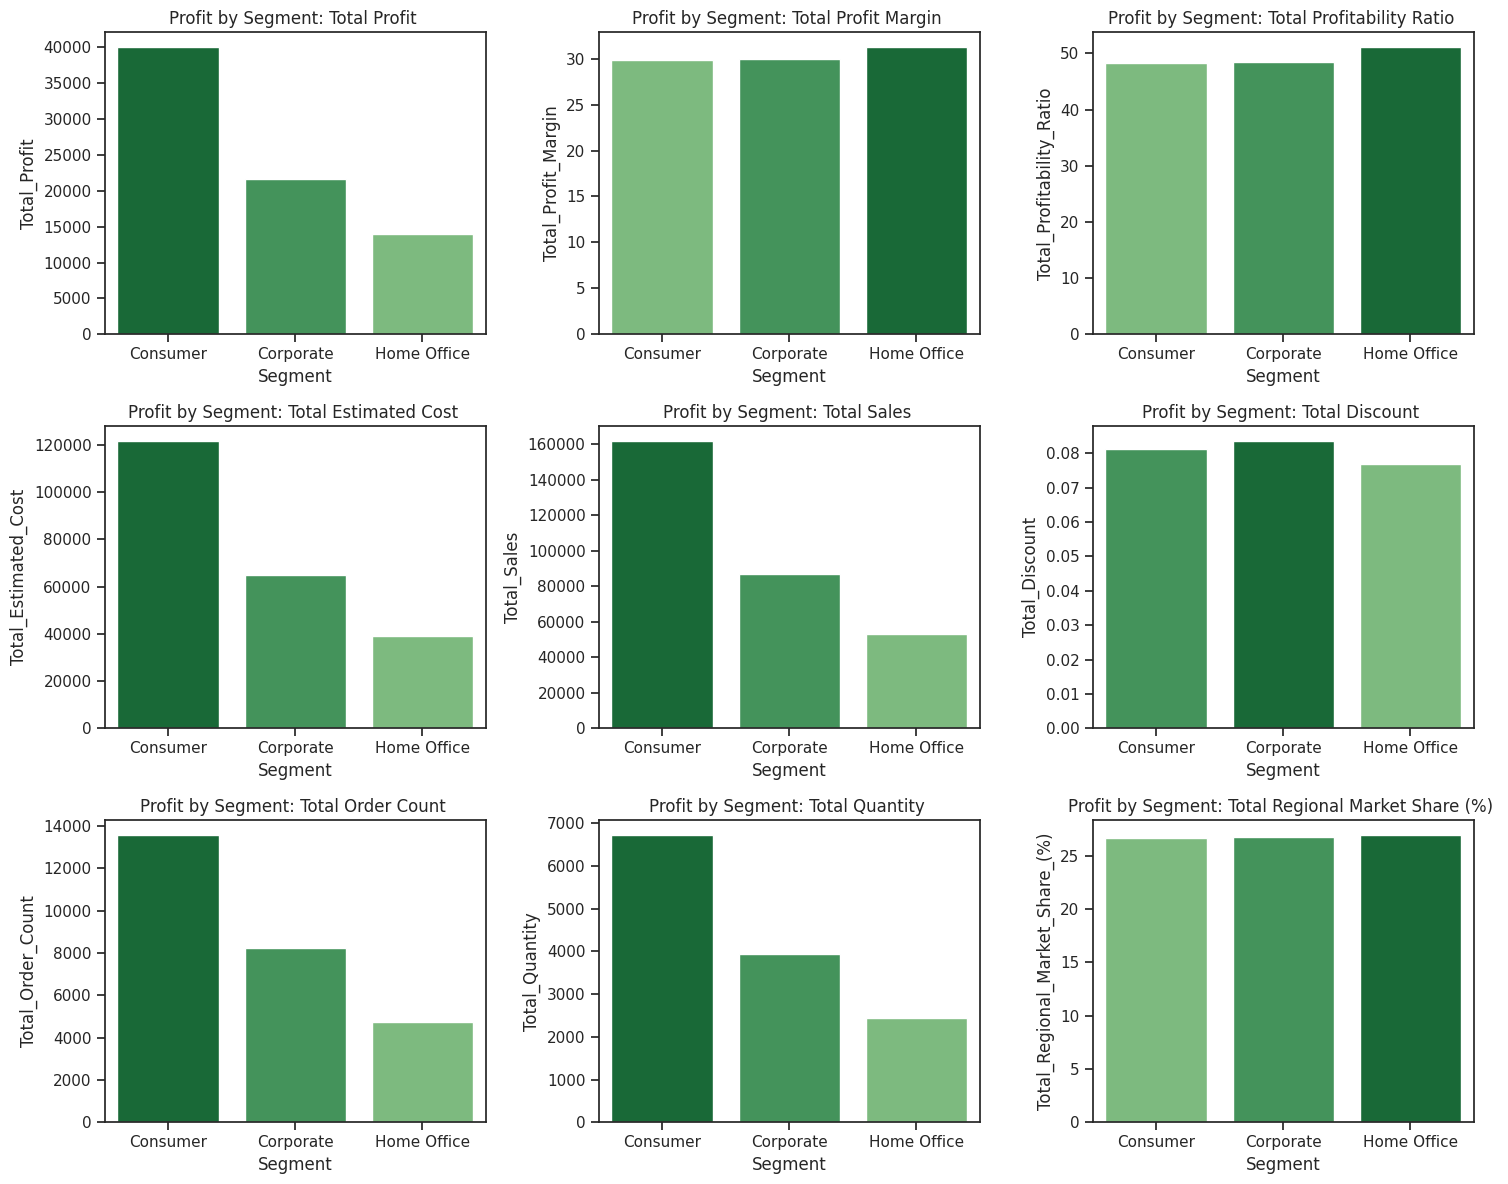

In [18]:
# Visualize the metrics and save the figure
save_path = "/content/profit_by_segment.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=5)[2:]  # Select the darker shades

# Visualize metrics by segment
dvu.plot_metrics_grid(
    data1=table_segment,
    metrics=metrics,
    group_by_column='Segment',
    title_prefix="Profit by Segment: ",
    palette=profit_palette
    # abbrev=True
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


## Category

In [19]:
# Use the aggregate function to calculate metrics for each segment
table_category = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category'])

# Display the results
print("\nSummary Table for Profits by Category:")
table_category


Summary Table for Profits by Category:


,Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,12831.1565,24.487001,36.674214,57720.6430,70551.7995,0.069606,4222,1958,27.098193
1,Office Supplies,45086.2015,33.354569,55.580809,102424.1405,147510.3420,0.081344,18096,9186,26.718091
2,Technology,17861.6224,22.176937,32.294618,65751.7896,83613.4120,0.092254,4217,1965,26.256165



### **Category Analysis**

1. **Top-Performing Category**:
   - **Office Supplies** leads with the highest **Total Profit (\$45,086.20)** and the largest **Profit Margin (33.35%)**, demonstrating strong cost efficiency and revenue generation.

2. **Furniture Insights**:
   - **Furniture** has the lowest **Profit Margin (24.49%)** and **Profitability Ratio (36.67%)**, indicating higher costs relative to sales.
   - Efforts to optimize pricing or reduce costs in this category could significantly improve profitability.

3. **Technology Potential**:
   - While **Technology** has the second-highest **Total Sales (\$83,613.41)**, its **Profit Margin (22.18%)** and **Profitability Ratio (32.29%)** are the lowest, suggesting this category might benefit from cost management or pricing adjustments.
   - Higher discounts (**9.23%**) might be contributing to the lower margins.

4. **Order Count and Quantity**:
   - **Office Supplies** dominates in terms of **Order Count (18,096)** and **Quantity (9,186)**, highlighting its consistent demand across customers.
   - **Furniture** trails in both metrics, reflecting its lower volume and potentially larger unit sizes.

5. **Regional Market Share**:
   - Market shares are fairly balanced across categories, with all hovering around **26–27%**, suggesting no single category has a dominant regional edge.

---

### **Actionable Insights**:
1. **Improve Furniture Profitability**:
   - Focus on reducing costs or increasing pricing efficiency in Furniture to raise margins and profitability.

2. **Leverage Office Supplies**:
   - Continue capitalizing on the high profitability and demand of Office Supplies, potentially expanding the product line or enhancing marketing efforts.

3. **Optimize Technology Discounts**:
   - Reassess the discounting strategy for Technology to strike a better balance between sales volume and profitability.



Figure saved as /content/profit_by_category.png


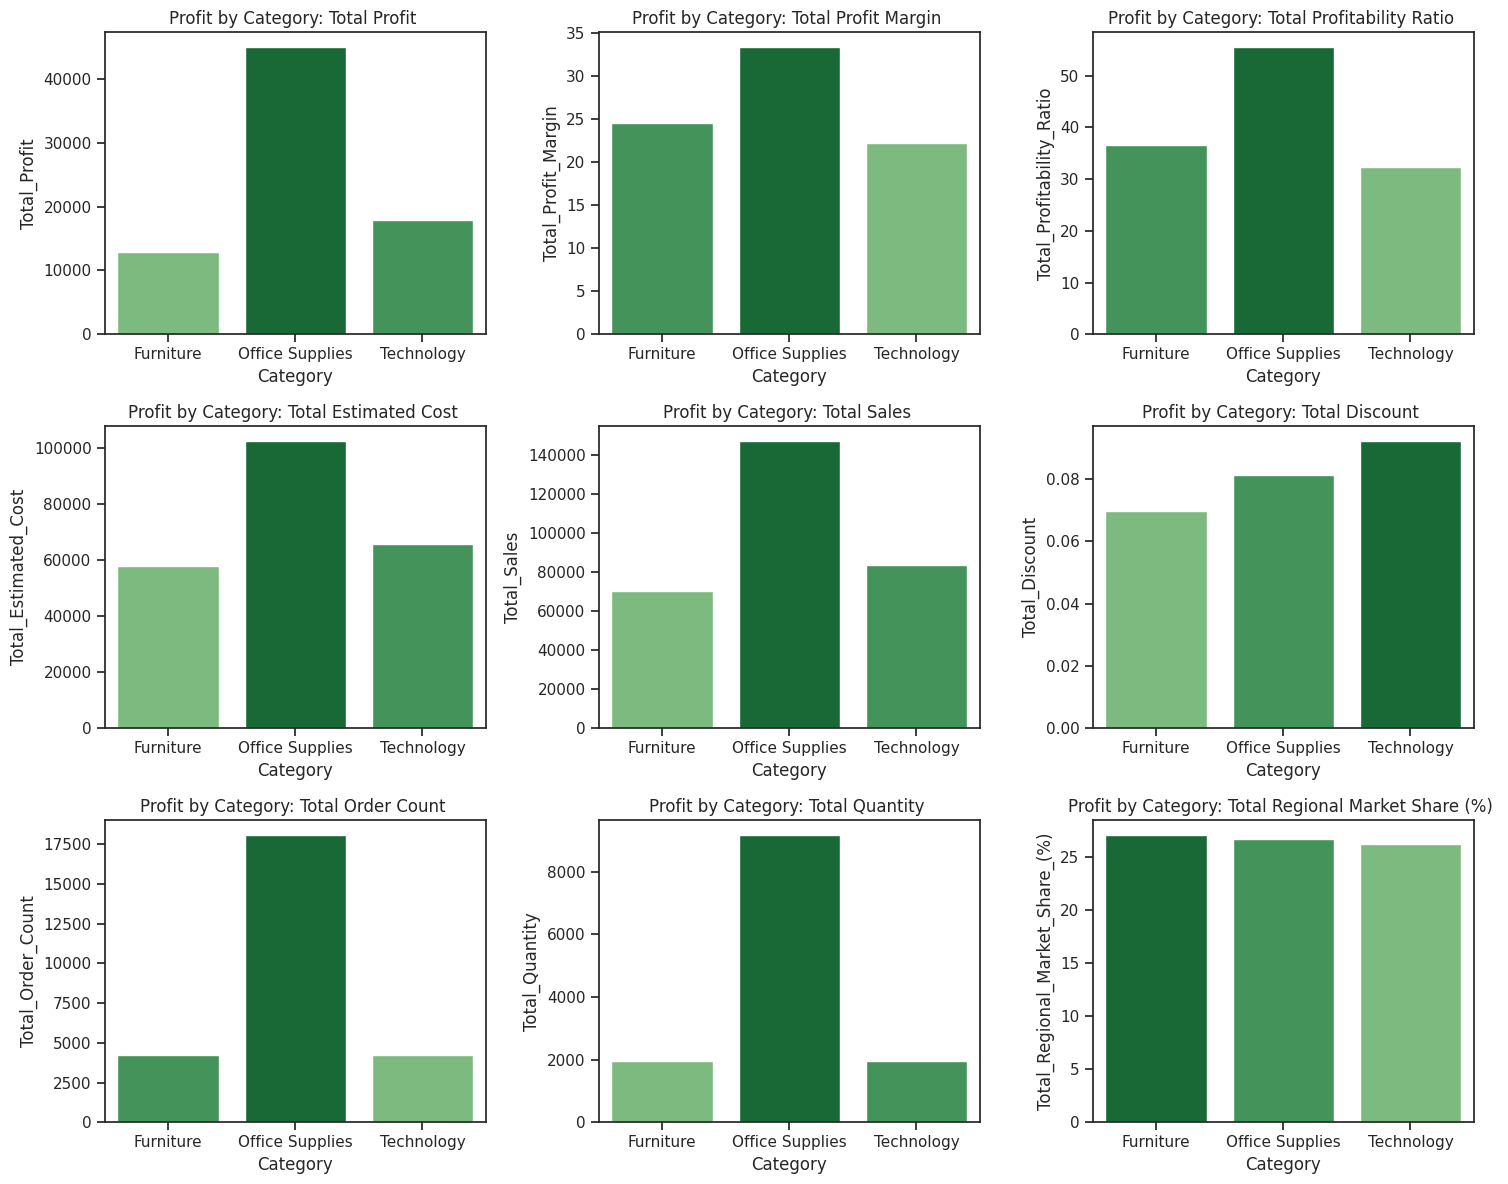

In [20]:
# Visualize the metrics and save the figure
save_path = "/content/profit_by_category.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=5)[2:]  # Select the darker shades

# Visualize metrics by Category
dvu.plot_metrics_grid(
    data1=table_category,
    metrics=metrics,
    group_by_column='Category',
    title_prefix="Profit by Category: ",
    palette=profit_palette
    # abbrev=True
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Sub-Category

In [21]:
# Use the aggregate function to calculate metrics for each sub-category
table_subcategory = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category', 'Sub-Category'])

# Display the results
print("\nSummary Table for Profits by Sub-Category:")
table_subcategory


Summary Table for Profits by Sub-Category:


,Category,Sub-Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,Bookcases,1102.9988,12.083789,14.816095,9153.2627,10256.2615,0.089535,328,122,26.657633
1,Furniture,Chairs,2944.3988,12.528292,15.302126,20934.7192,23879.1180,0.124074,839,304,26.629569
2,Furniture,Furnishings,8151.0009,29.610706,45.747311,22531.7571,30682.7580,0.051095,2902,1480,27.275505
3,Furniture,Tables,632.7580,11.715909,14.812462,5100.9040,5733.6620,0.109091,153,52,26.947299
4,Office Supplies,Appliances,5370.1325,24.169935,33.733622,15920.1455,21290.2780,0.056471,1187,628,26.802575
5,Office Supplies,Art,3500.8567,25.368421,36.836684,10352.7553,13853.6120,0.073684,3209,1636,26.536983
6,Office Supplies,Binders,8348.5912,38.954321,65.797317,12830.0768,21178.6680,0.131852,2966,1541,28.178530
7,Office Supplies,Envelopes,3652.8002,42.051724,74.815466,4997.3618,8650.1620,0.086897,1102,488,25.169291
8,Office Supplies,Fasteners,515.2037,32.334112,55.571682,1009.2883,1524.4920,0.067290,825,448,26.459705
9,Office Supplies,Labels,1797.2501,42.224462,75.240160,2353.5019,4150.7520,0.080645,1353,650,26.223364


### **Sub-Category Analysis**

1. **Top Performers in Profit:**
   - **Paper** from **Office Supplies** is the most profitable sub-category, contributing a staggering **\$16,285.49**, with a profit margin of **42.35%** and a profitability ratio of **75.59%**. This reflects strong cost efficiency and sales impact.
   - **Furnishings** from **Furniture** follows, with a significant profit of **\$8,151.00** and a high profitability ratio of **45.75%**, indicating strong returns relative to costs.

2. **Profitability and Margins:**
   - **Labels** (Office Supplies) and **Machines** (Technology) demonstrate outstanding profitability ratios of **75.24%** and **73.92%**, respectively, driven by their efficiency in converting costs to profits.
   - **Envelopes** from Office Supplies stands out for the highest profit margin (**42.05%**) among all sub-categories.

3. **Underperforming Sub-Categories:**
   - **Copiers** in Technology has very low profit (**\$89.99**) and limited market share, indicating an area of potential improvement or reconsideration of strategy.
   - **Tables** in Furniture generates only **\$632.76** in profit despite its significant cost base, suggesting inefficiency or pricing issues.

4. **Sales-Driven Success:**
   - **Phones** (Technology) reports the highest sales figure (**\$46,187.76**) but with a relatively lower profit margin (**17.56%**). This implies a volume-driven strategy with room to improve margins.
   - **Storage** in Office Supplies records substantial sales of **\$35,877.54**, yet its profit margin is low at **15.70%**, indicating inefficiencies in cost control or pricing.

5. **Cost-Heavy Sub-Categories:**
   - **Phones** incurs the highest costs at **\$38,522.18**, aligning with its sales dominance but reflecting a need for better cost management to increase profitability.
   - **Storage** also shows a high cost base of **\$30,712.26**, making it less efficient compared to peers like **Paper** or **Binders**.

6. **Order and Quantity Insights:**
   - **Paper** leads in both total order count (**4,909 orders**) and quantity sold (**2,554 units**), showcasing its importance as a high-volume sub-category.
   - **Art** (Office Supplies) also demonstrates robust volume with **3,209 orders**, despite lower total profit compared to top performers.

7. **Regional Market Share:**
   - Sub-categories in **Technology** like **Copiers** and **Machines** capture the highest regional market share (**31.58%** and **28.14%**, respectively), indicating their importance in specific markets.
   - **Paper**, while a high performer, only captures **26.50%** of the regional market, suggesting room for growth.

---

### **Strategic Recommendations:**

1. **Focus on High Performers:**
   - Strengthen efforts to further enhance **Paper**, **Furnishings**, and **Binders** as they demonstrate robust profitability and efficiency.
   - Leverage the high sales and order volumes in **Phones** and **Storage**, while addressing cost inefficiencies to boost profit margins.

2. **Reevaluate Underperformers:**
   - Review the pricing, costs, and sales strategy for **Tables** (Furniture) and **Copiers** (Technology) as these sub-categories generate minimal profit.

3. **Market Expansion Opportunities:**
   - Increase the market share for profitable sub-categories like **Paper** and **Binders** in regions where their penetration is low compared to peers.

4. **Cost Optimization:**
   - Implement cost control measures for sub-categories with high cost-to-sales ratios, such as **Phones** and **Storage**, without compromising sales.

5. **Increase Margins:**
   - Focus on sub-categories with high sales but low margins, such as **Phones**, to identify pricing or operational inefficiencies that can be improved.


In [ ]:
# ft_table = table_subcategory[table_subcategory['Category'].isin(['Furniture', 'Technology'])]
# office_table = table_subcategory[table_subcategory['Category'].isin(['Office Supplies'])]

# # Sort tables by Total Profit
# ft_table_sorted = ft_table.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)
# office_table_sorted = office_table.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)

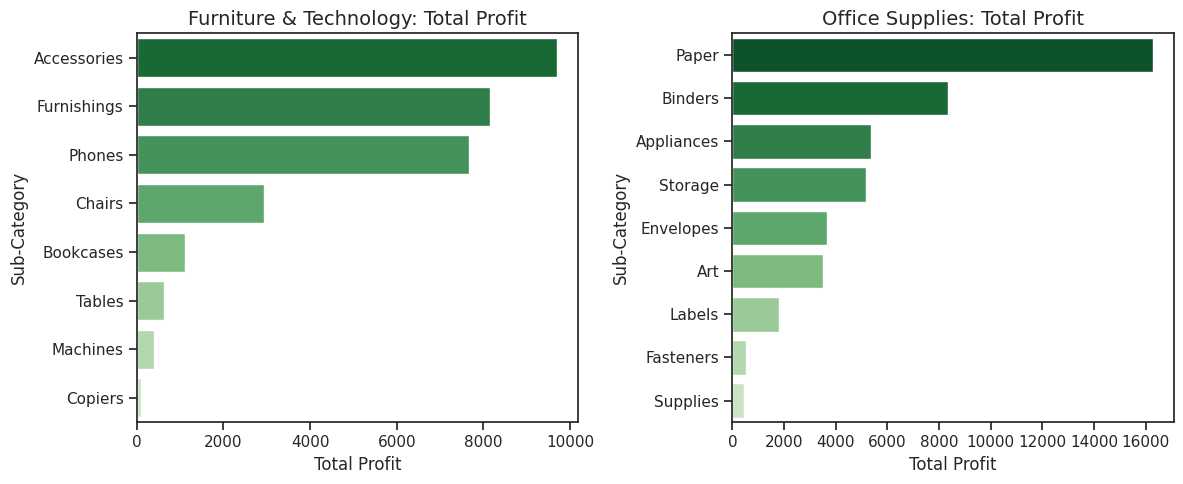

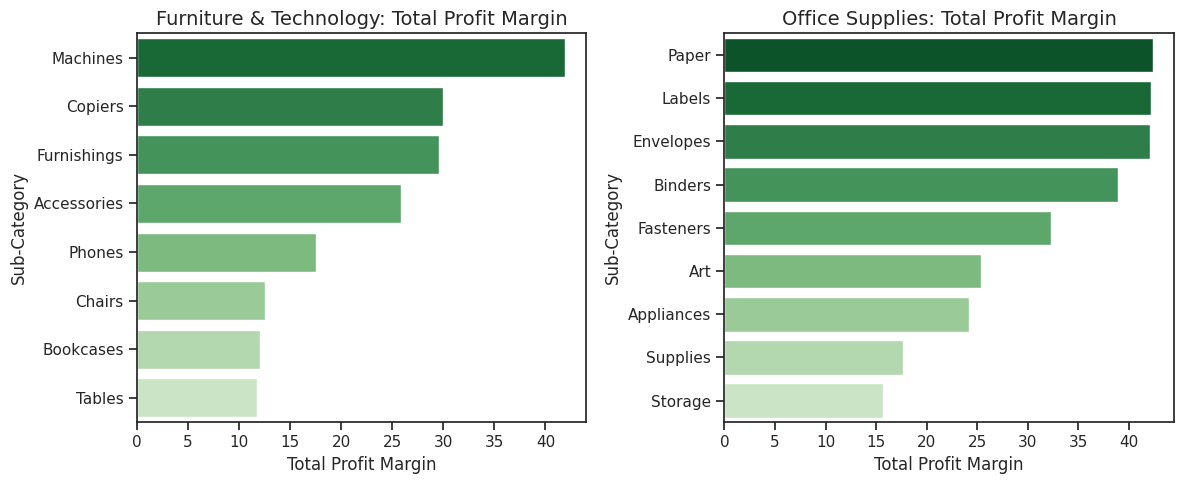

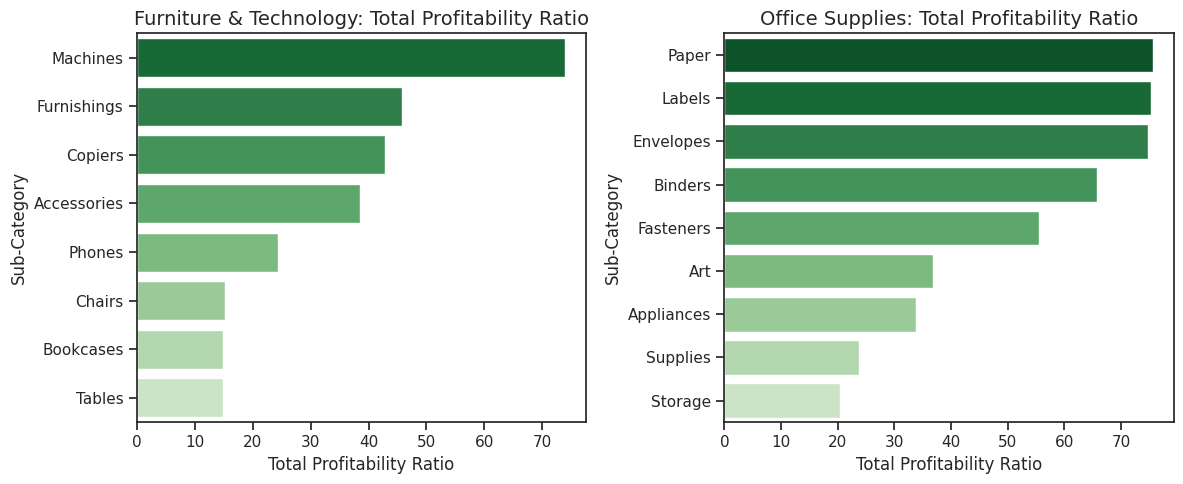

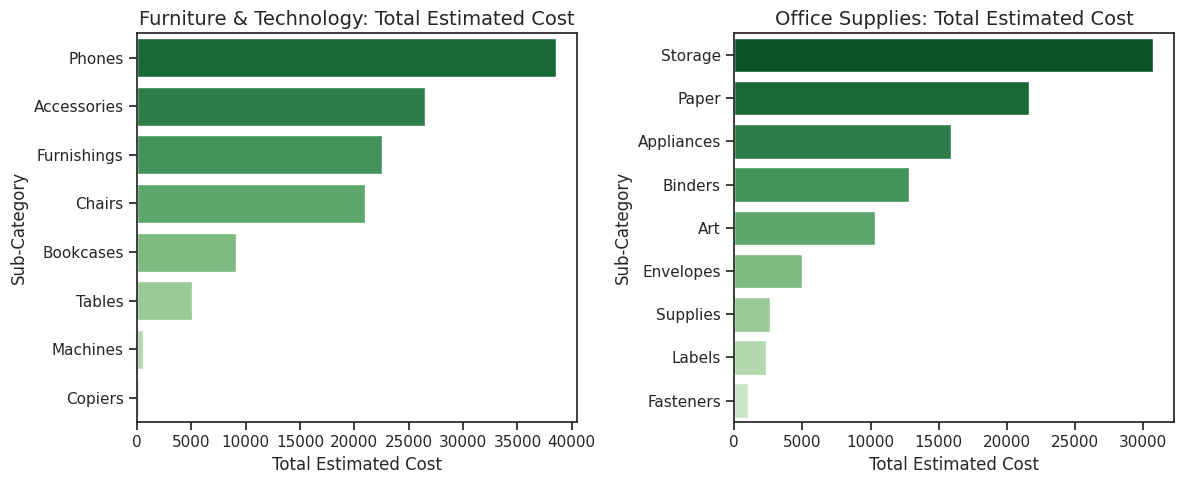

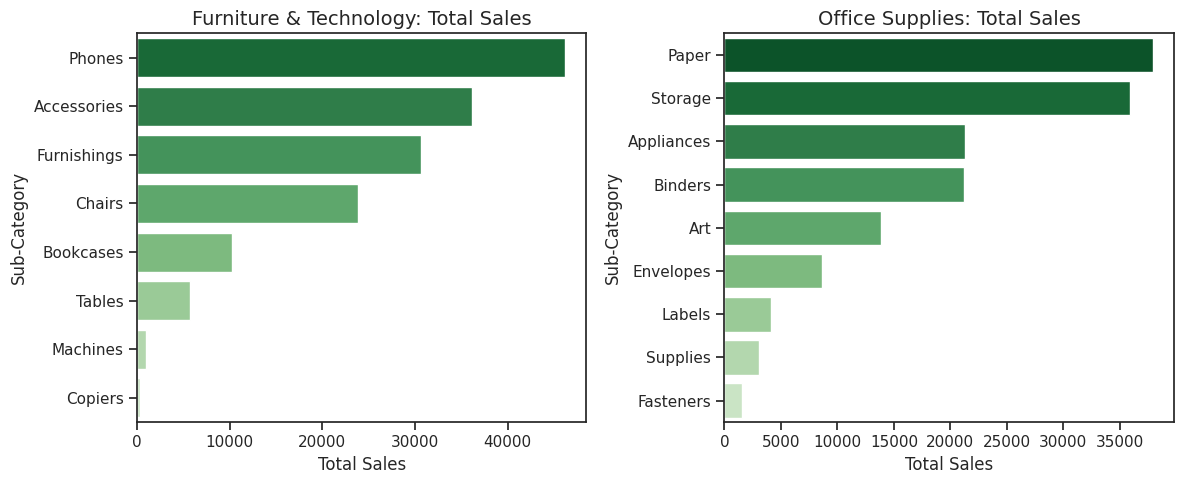

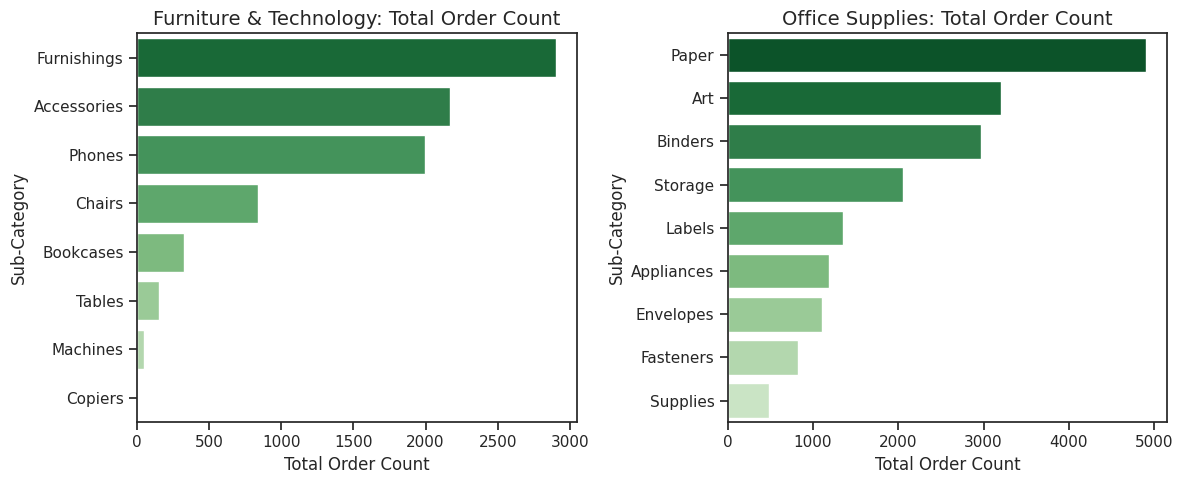

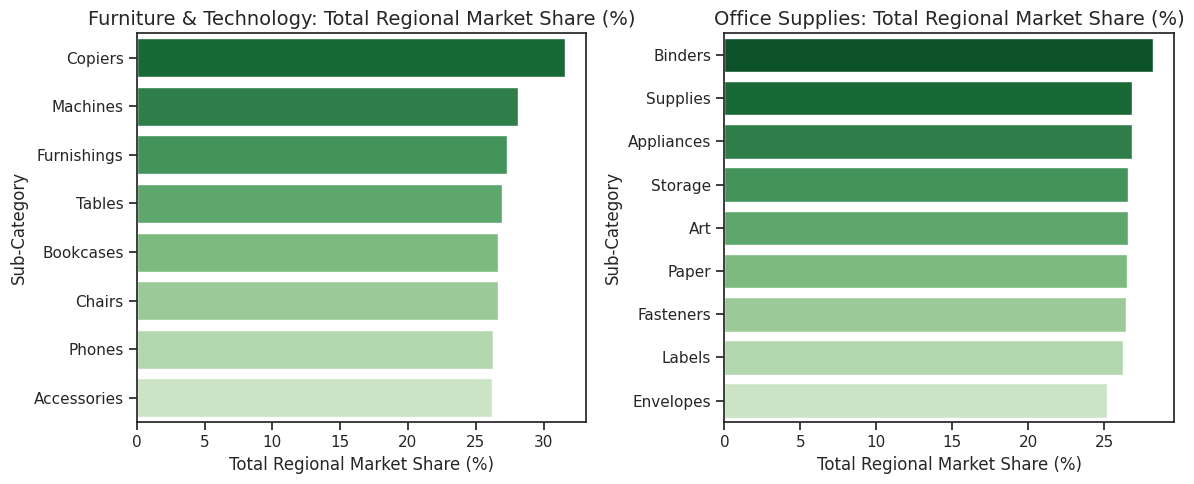

In [23]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Filter and sort datasets
ft_table = table_subcategory[table_subcategory['Category'].isin(['Furniture', 'Technology'])]
office_table = table_subcategory[table_subcategory['Category'].isin(['Office Supplies'])]

# Reset categories for Sub-Category in each dataset using .loc
ft_table.loc[:, 'Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table.loc[:, 'Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Total Profit
ft_table_sorted = ft_table.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)

# Metrics to analyze
metrics = [
    'Total_Profit',
    'Total_Profit_Margin',
    'Total_Profitability_Ratio',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Order_Count',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_subcategory.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=11)[2:]  # Select the darker shades

# Loop through metrics and plot each
dvu.plot_metrics_grid_2(
    data1=ft_table_sorted,
    data2=office_table_sorted,
    metrics=metrics,  # List of metrics
    group_by_column='Sub-Category',
    title1="Furniture & Technology",
    title2="Office Supplies",
    palette=profit_palette,
    figsize=(12,5)
)

# # Save the current figure
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
# print(f"Figure saved as {save_path}")

##Region, Category, Sub-Category

In [24]:
# Create the aggregated table grouped by Region, Category, and Sub-Category
table_subcategory_region = dpu.calculate_aggregate_metrics(
    data=df,
    group_by_columns=['Region', 'Category', 'Sub-Category']
)

# Sort by Total Profit (descending for profits)
table_subcategory_region_sorted = table_subcategory_region.sort_values(['Region', 'Total_Profit'], ascending=[True, False])

# Ensure 'Region' is treated as a category (optional but helpful for consistency)
if not pd.api.types.is_categorical_dtype(table_subcategory_region_sorted['Region']):
    table_subcategory_region_sorted['Region'] = table_subcategory_region_sorted['Region'].astype('category')

# Select the top 5 sub-categories with the highest profits per region
top_profits_by_region = (
    table_subcategory_region_sorted
    .groupby('Region', observed=True)  # observed=True ensures only observed categories are used if 'Region' is categorical
    .head(5)
    .reset_index(drop=True)
)

# Display the results
print("\nTop 5 Sub-Categories with Highest Profits per Region:")
top_profits_by_region


Top 5 Sub-Categories with Highest Profits per Region:


,Region,Category,Sub-Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Office Supplies,Paper,3653.7557,39.021341,65.801547,5579.7643,9233.520,0.129268,1162,648,21.819594
1,Central,Technology,Phones,2406.3919,17.551370,23.927511,11254.4401,13660.832,0.120548,541,236,21.819594
2,Central,Technology,Accessories,2212.9362,24.974265,36.275460,6673.0758,8886.012,0.120588,537,256,21.819594
3,Central,Office Supplies,Binders,1192.6763,47.785714,91.697904,1294.4237,2487.100,0.000000,391,229,21.819594
4,Central,Office Supplies,Envelopes,1117.3857,39.190789,66.287748,1704.2883,2821.674,0.126316,265,122,21.819594
5,East,Office Supplies,Paper,4657.2186,42.864474,77.234531,5729.3834,10386.602,0.069474,1391,723,29.548188
6,East,Office Supplies,Binders,3164.0405,38.947154,65.724977,4805.3015,7969.342,0.131707,887,482,29.548188
7,East,Technology,Phones,2808.7896,26.661538,40.450083,7915.9544,10724.744,0.024615,490,210,29.548188
8,East,Technology,Accessories,2604.2789,25.817308,39.111325,6212.1311,8816.410,0.066667,549,251,29.548188
9,East,Furniture,Furnishings,2254.0126,28.458333,43.520529,6790.7214,9044.734,0.073016,897,445,29.548188


### **Regional Performance Overview**

#### **Central Region:**
- **Top Performer:**
  - **Paper** from Office Supplies stands out as the highest profit generator (**\$3,653.76**) with excellent profitability ratio (**65.80%**) and margin (**39.02%**).
- **Technology Dominance:**
  - **Phones** and **Accessories** rank second and third in profit, with combined sales exceeding **$22,500**, though both have lower profitability ratios compared to Paper.
- **Highly Efficient Sub-Categories:**
  - **Binders** achieves an exceptional profitability ratio (**91.70%**) and margin (**47.79%**), indicating outstanding cost efficiency and profitability.
  - **Envelopes** also shows high efficiency with a profitability ratio of **66.29%**.

#### **East Region:**
- **Paper Reigns Supreme:**
  - **Paper** dominates with **\$4,657.22** in profit, the highest in the region, coupled with an impressive profitability ratio (**77.23%**) and margin (**42.86%**).
- **Diversified Strength:**
  - **Binders**, **Phones**, and **Accessories** from Technology and Office Supplies contribute significantly, each with profits exceeding **\$2,500** and strong cost efficiency.
- **Furnishings Growth:**
  - **Furnishings** emerges as a top-performing Furniture sub-category, generating over **$2,200** in profit with a profitability ratio of **43.52%**.

#### **South Region:**
- **Paper Leading Profits:**
  - **Paper** generates **\$2,437.43**, with a profitability ratio (**68.64%**) and margin (**39.97%**) showcasing strong performance.
- **Furniture and Technology Potential:**
  - **Furnishings** and **Accessories** contribute over **$1,400** each, indicating opportunities for growth in these categories.
- **Underperforming Phones:**
  - Despite high sales (**\$6,062.83**), **Phones** deliver a lower profit (**\$864.67**) and profitability ratio (**23.53%**), highlighting inefficiencies.

#### **West Region:**
- **Paper Dominates:**
  - **Paper** outshines all other sub-categories in profits (**\$5,537.08**) and efficiency, with a profitability ratio of **84.59%** and margin of **45.46%**.
- **High-Earning Furnishings:**
  - **Furnishings** ranks second in profit (**\$3,954.38**) with robust sales (**\$13,692.35**) and a profitability ratio (**48.85%**).
- **Technology Contributions:**
  - **Accessories** reports significant profits (**\$3,484.84**) with solid efficiency metrics, making it a key contributor to regional success.
- **Storage Concerns:**
  - **Storage** generates moderate profit (**\$2,244.49**) but struggles with a low profitability ratio (**22.60%**), indicating cost inefficiencies.

---

### **Key Trends Across Regions**
1. **Paper is Consistently the Best Performer:**
   - Across all regions, **Paper** is the leading sub-category in terms of profits, with excellent profitability ratios (65–85%) and robust sales, making it a strategic focus area.
   
2. **Strong Technology Contributions:**
   - Sub-categories like **Phones** and **Accessories** consistently rank in the top five across all regions, indicating their importance for sustained profitability, though opportunities exist to improve cost efficiency.

3. **Efficient Sub-Categories to Leverage:**
   - Sub-categories like **Binders**, **Furnishings**, and **Envelopes** show exceptionally high profitability ratios and margins, offering potential for scaling.

4. **Regional Specialization:**
   - Each region shows unique strengths:
     - The **East** and **West** regions have a broader distribution of high-performing sub-categories.
     - The **Central** region benefits significantly from Office Supplies like **Paper** and **Binders**.
     - The **South** region, though slightly lagging, has strong contributions from **Paper** and **Furnishings**.

---

### **Strategic Recommendations**
1. **Scale Paper Sales:**
   - Invest in marketing and operational efficiency for **Paper**, given its profitability and consistent performance across all regions.
   
2. **Improve Technology Efficiency:**
   - Enhance cost management for **Phones** and **Accessories**, especially in regions like the South, to better convert sales into profits.

3. **Focus on High Efficiency:**
   - Sub-categories like **Binders** and **Envelopes** demonstrate remarkable profitability and efficiency, making them ideal candidates for scaling or deeper market penetration.

4. **Address Inefficiencies in Storage:**
   - Review the pricing and cost structure for **Storage** in the West region, where low profitability hampers overall performance.


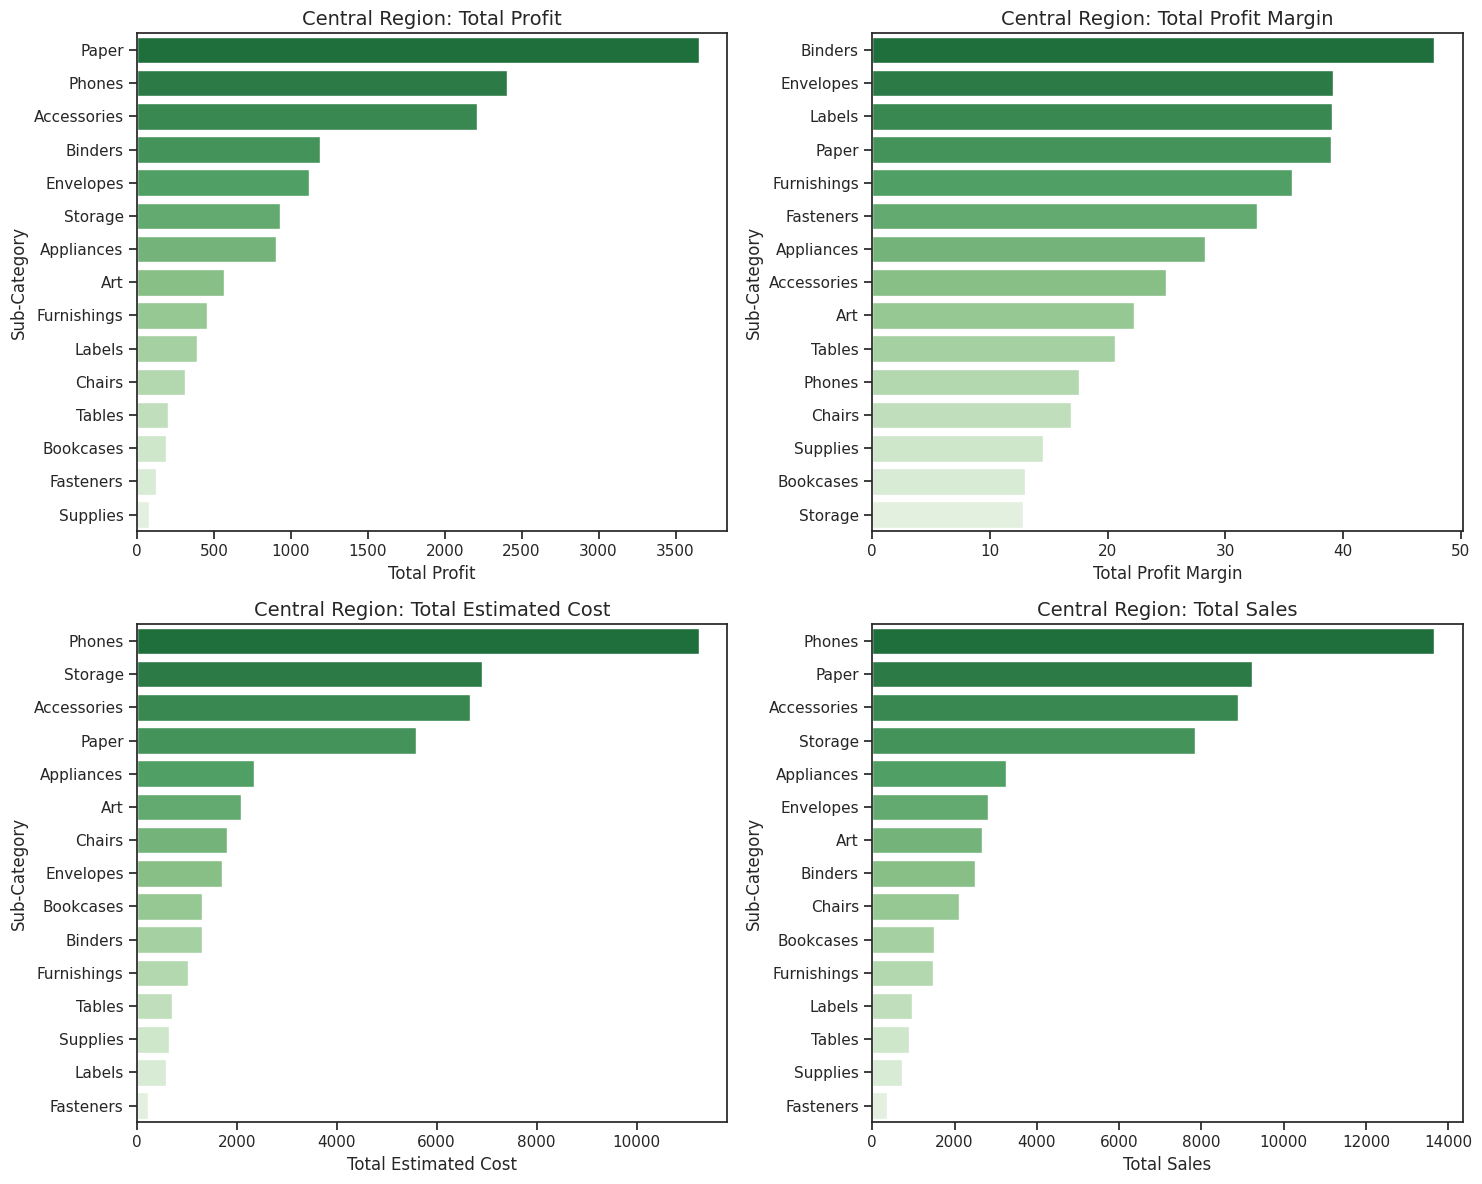

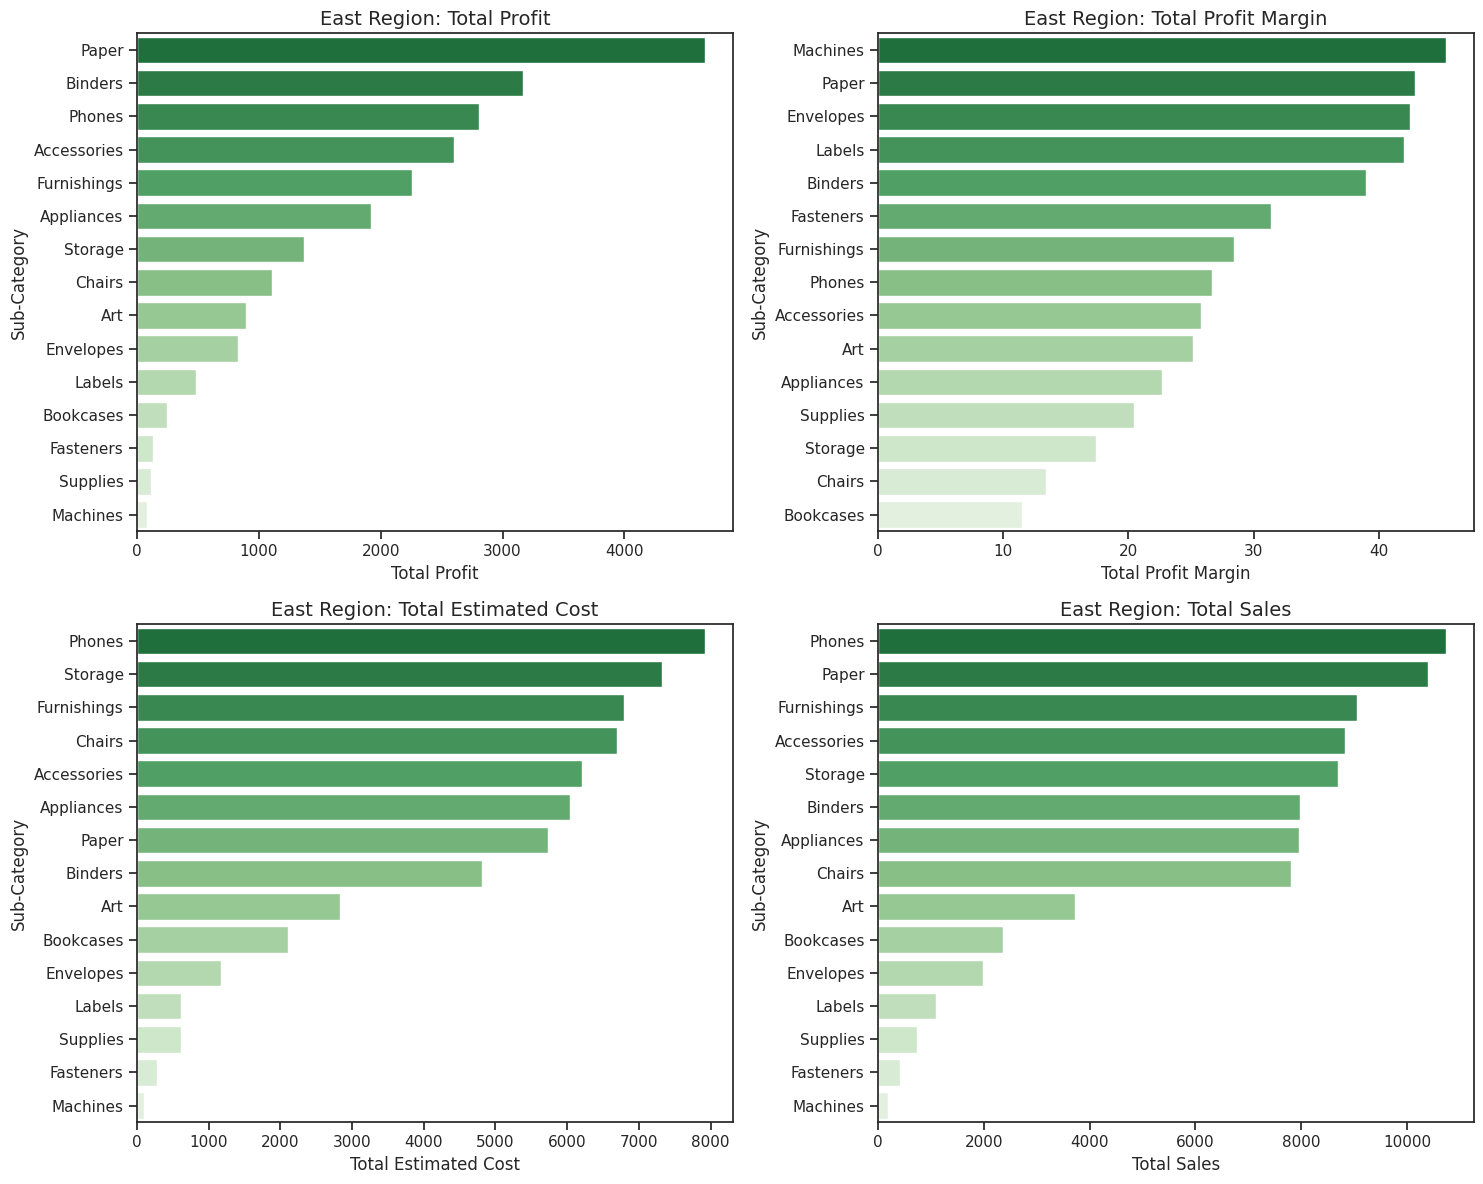

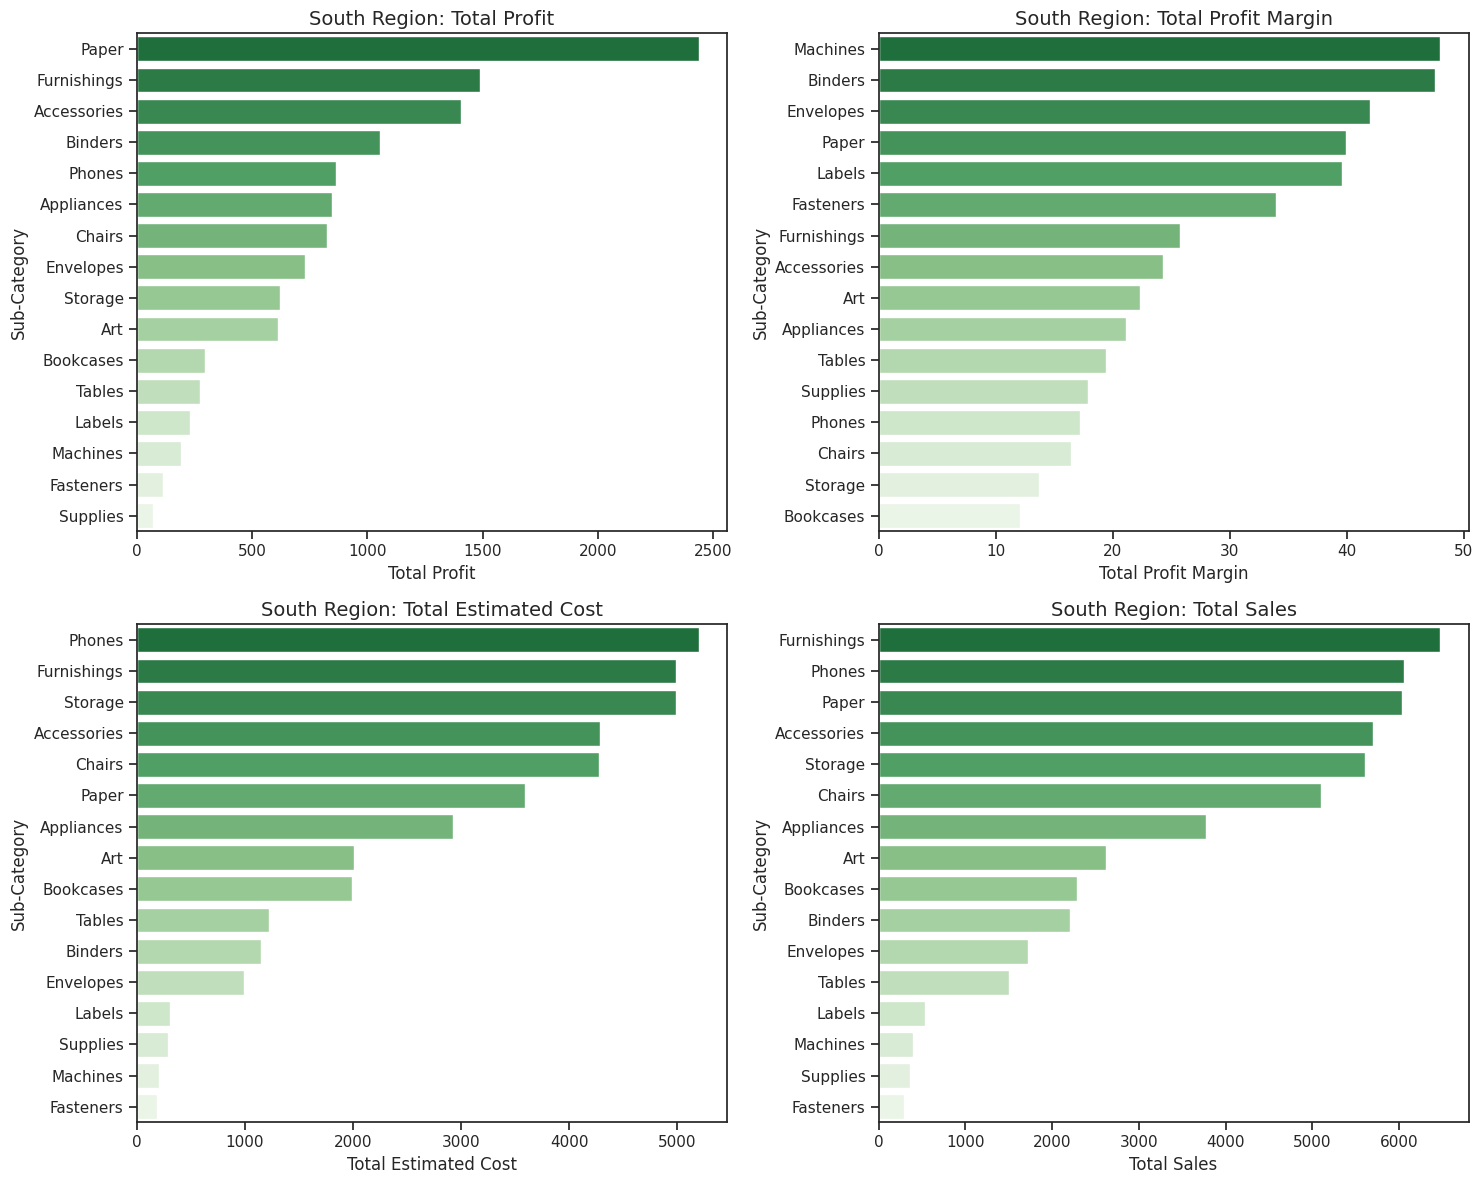

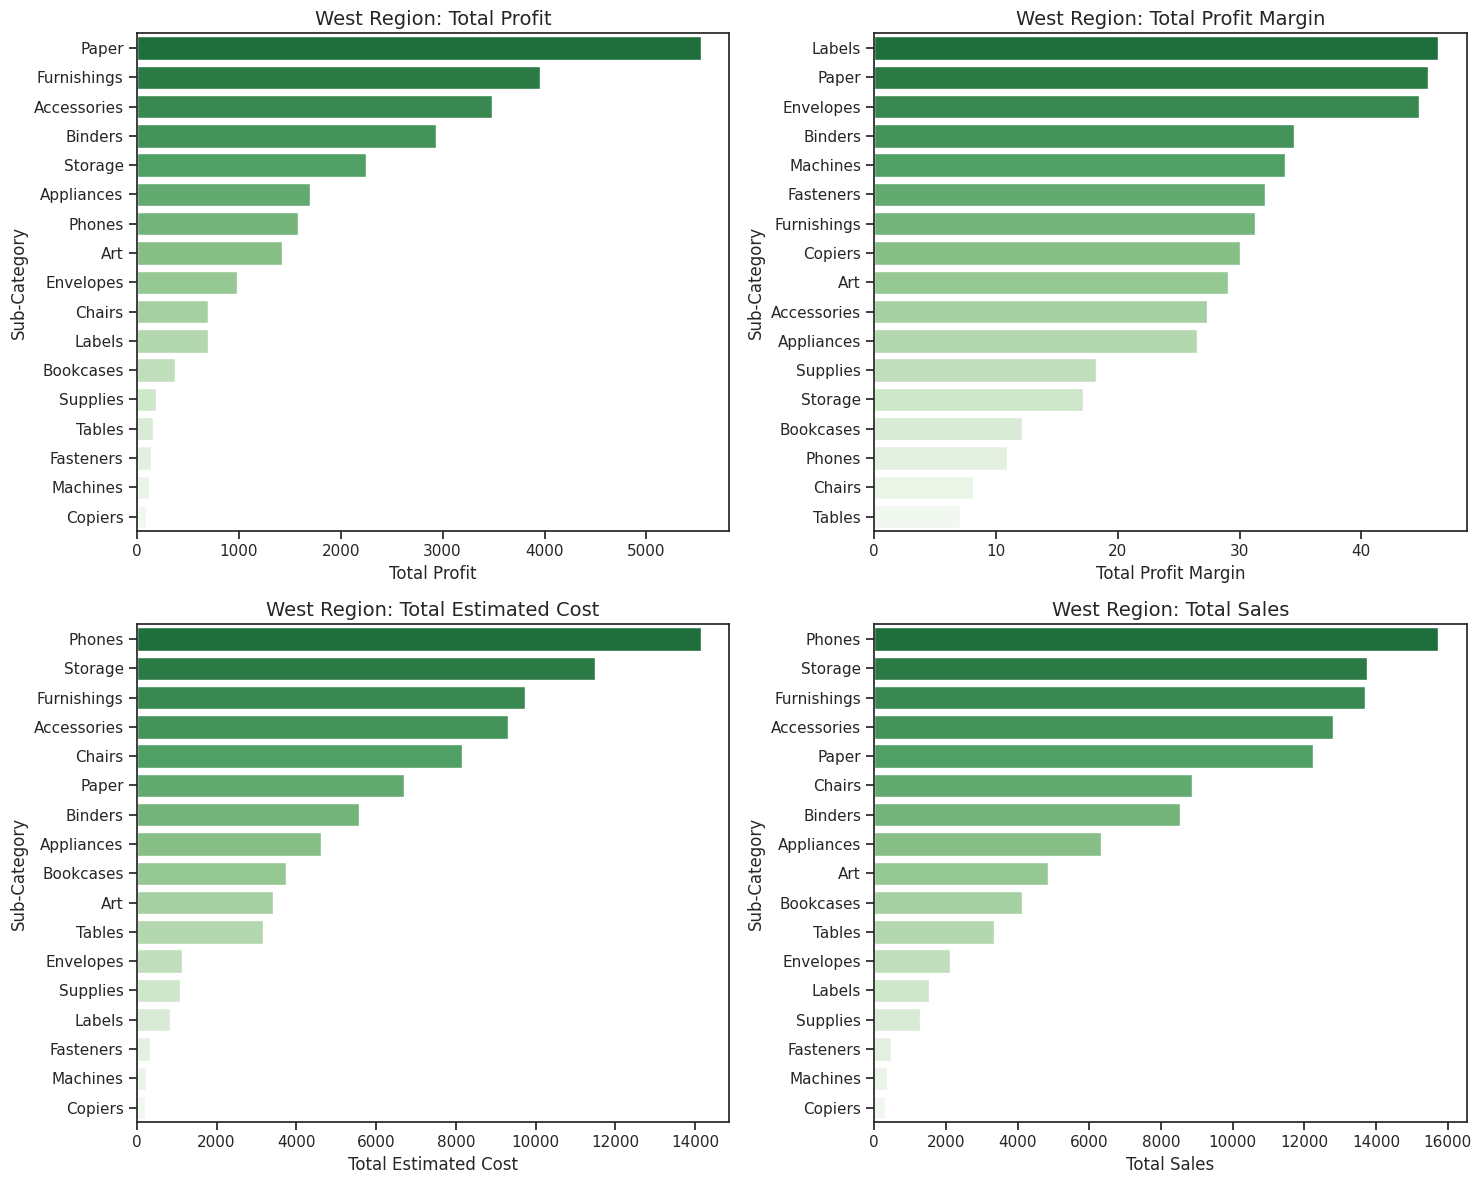

In [28]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Split the data by region
regions = table_subcategory_region['Region'].unique()

# Metrics to analyze
metrics = [
    'Total_Profit',
    'Total_Profit_Margin',
    'Total_Estimated_Cost',
    'Total_Sales'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region_category_subcategory.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens_r", n_colors=20)[3:]  # Select the darker shades

# Plot metrics for each region
for region in regions:
    # Filter data for the current region
    region_data = table_subcategory_region[table_subcategory_region['Region'] == region]

    # Sort by Total Profit (descending)
    region_data_sorted = region_data.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)

    # Plot the metrics
    dvu.plot_metric_grid_single(
        data=region_data_sorted,
        metrics=metrics,
        group_by='Sub-Category',
        title_prefix=f"{region} Region: ",
        palette=profit_palette
    )

# # Save the current figure
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
# print(f"Figure saved as {save_path}")


Figure saved as /content/profit_by_select_region_subcategory.png


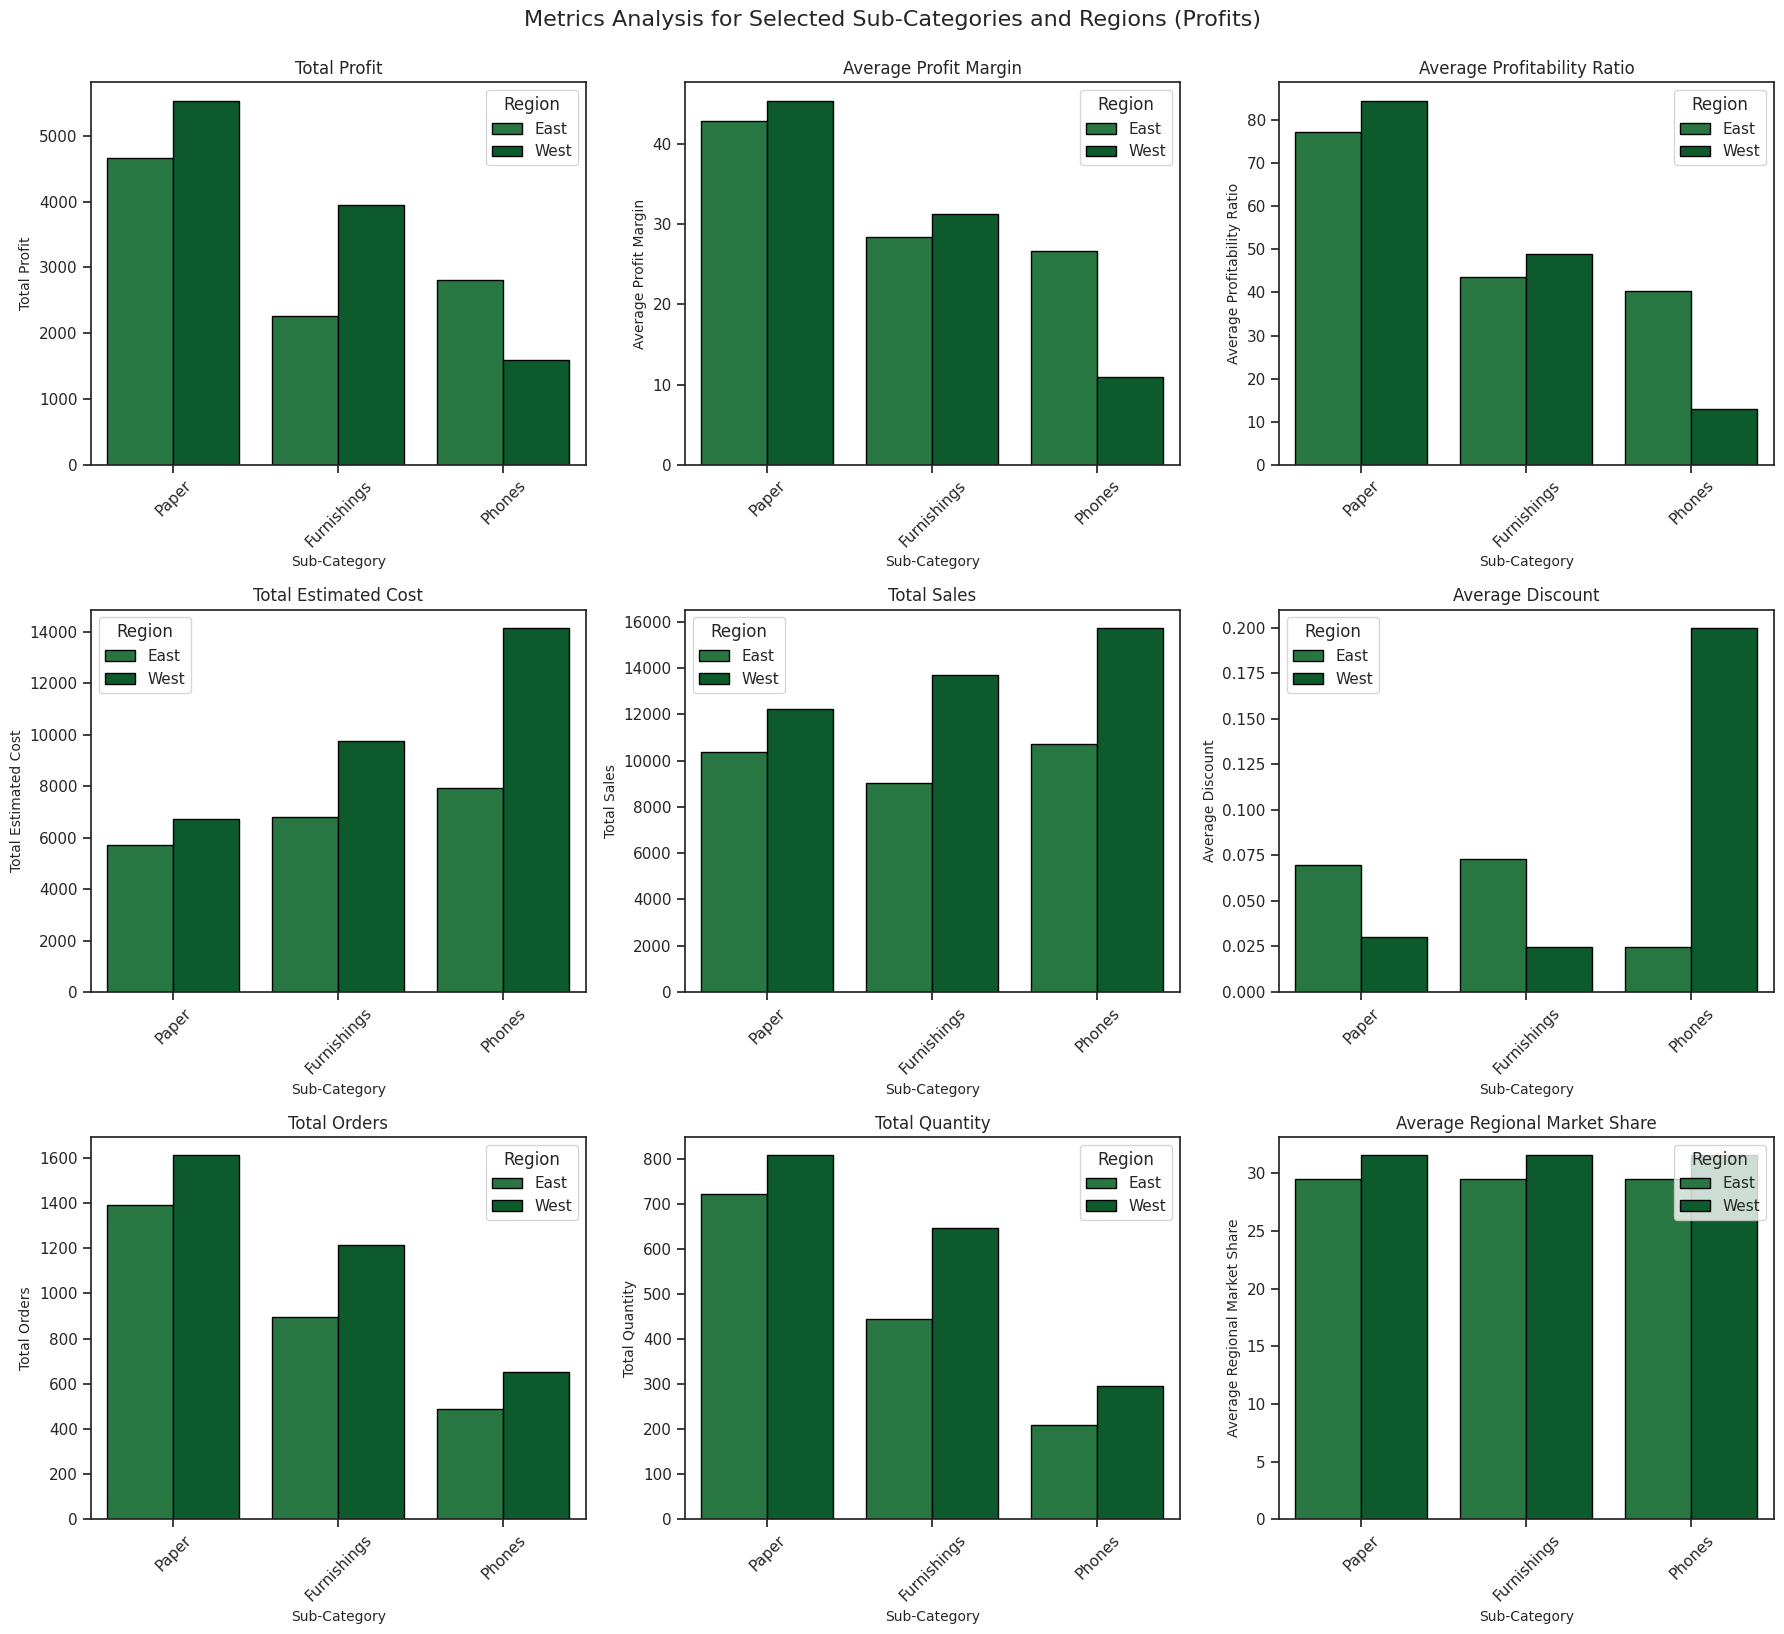

In [35]:
# Define the filters
selected_regions = ['East', 'West']
selected_subcategories = ['Paper', 'Furnishings', 'Phones']

# Define the metrics to plot (Display Name: Column Name)
metrics_to_plot = {
    "Total Profit": "Total_Profit",
    "Average Profit Margin": "Total_Profit_Margin",
    "Average Profitability Ratio": "Total_Profitability_Ratio",
    "Total Estimated Cost": "Total_Estimated_Cost",
    "Total Sales": "Total_Sales",
    "Average Discount": "Total_Discount",
    "Total Orders": "Total_Order_Count",
    "Total Quantity": "Total_Quantity",
    "Average Regional Market Share": "Total_Regional_Market_Share_(%)"
}

# Filter the data
filtered_data = table_subcategory_region[
    (table_subcategory_region['Region'].isin(selected_regions)) &
    (table_subcategory_region['Sub-Category'].isin(selected_subcategories))
].copy()

# Convert to categorical for consistent plotting
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

# Visualize the metrics and save the figure
save_path = "/content/profit_by_select_region_subcategory.png"

# Define a subset of darker greens for cost analysis
profit_palette = sns.color_palette("Greens", n_colors=3)[1:]  # Select the darker shades

# Call the plot function for all metrics
dvu.plot_filtered_metrics_grid(
    data=filtered_data,
    selected_regions=selected_regions,
    selected_subcategories=selected_subcategories,
    metrics=metrics_to_plot,
    title="Metrics Analysis for Selected Sub-Categories and Regions (Profits)",
    palette=profit_palette,
    figsize=(18, 16)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

#### Data Utils Script

In [1]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

#### Data Visualization Script

In [2]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()


def plot_metrics_grid_2(data1, data2=None, metrics=None, group_by_column="", title1="", title2="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 1x2 grid of barplots for single or multiple datasets with multiple metrics.

    Parameters:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the y-axis.
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure metrics is not None
    metrics = metrics or []

    # Check if single or dual dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for metric in metrics:
        fig, axes = plt.subplots(1, len(datasets), figsize=figsize)

        if len(datasets) == 1:
            axes = [axes]  # Ensure axes is iterable for single plot

        for i, (data, title_suffix, ax) in enumerate(zip(datasets, titles, axes)):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False)

            # Set the category order for the plot
            category_order = data_sorted[group_by_column]

            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by_column,
                hue=metric, palette=palette, legend=False, dodge=False,
                order=category_order,  # Explicitly set the order
                ax=ax
            )
            ax.set_title(f"{title_suffix}: {metric.replace('_', ' ')}", fontsize=14)
            ax.set_xlabel(metric.replace('_', ' '), fontsize=12)
            ax.set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()


def plot_metric_grid_single(data, metrics, group_by, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 2x2 grid of barplots for a given dataset and multiple metrics.

    Parameters:
    - data: DataFrame
        The dataset to plot (e.g., filtered data by region).
    - metrics: list
        The metrics to plot (e.g., ['Total_Profit', 'Total_Profit_Margin']).
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title (e.g., 'Central Region: ').
    - palette: str
        The color palette to use for the barplots.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Loop through metrics and plot each
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False).reset_index(drop=True)

            # Use group_by column values for ordering
            order = data_sorted[group_by].unique()

            # Plot the barplot
            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by,
                palette=palette,
                order=order,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{metric.replace('_', ' ')}", fontsize=14)
            axes[i].set_xlabel(metric.replace('_', ' '), fontsize=12)
            axes[i].set_ylabel(group_by.replace('_', ' '), fontsize=12)
        else:
            # Turn off unused subplots
            axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_filtered_metrics_grid(data, selected_regions, selected_subcategories, metrics, title, palette="Greens", figsize=(20, 16)):
    """
    Plots a grid of barplots for specified metrics filtered by regions and sub-categories.

    Parameters:
    - data: DataFrame
        The dataset containing the metrics and filters.
    - selected_regions: list
        The regions to filter by.
    - selected_subcategories: list
        The sub-categories to filter by.
    - metrics: dict
        A dictionary of metrics with keys as display names and values as column names to plot.
    - title: str
        The title of the entire plot grid.
    - palette: str
        The Seaborn color palette to use for the plots.
    - figsize: tuple
        The size of the figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filter the data based on selected regions and sub-categories
    filtered_data = data[
        (data['Region'].isin(selected_regions)) &
        (data['Sub-Category'].isin(selected_subcategories))
    ].copy()

    # Convert to categorical for consistent plotting
    filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
    filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

    # Create a custom palette
    # Define the number of colors needed
    num_colors = len(selected_regions)

    # Select colors from the bolder end of the spectrum
    custom_palette = sns.color_palette("Greens", n_colors=8)[-num_colors:]


    # Set up the grid dimensions
    n_cols = 3  # Number of columns
    n_rows = -(-len(metrics) // n_cols)  # Ceiling division for rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Plot each metric
    for (display_name, column_name), ax in zip(metrics.items(), axes):
        sns.barplot(
            data=filtered_data,
            x="Sub-Category",
            y=column_name,
            hue="Region",
            palette=custom_palette,
            edgecolor="black",
            ax=ax
        )
        ax.set_title(display_name, fontsize=12)
        ax.set_xlabel("Sub-Category", fontsize=10)
        ax.set_ylabel(display_name, fontsize=10)
        ax.tick_params(axis="x", rotation=45)

    # Turn off unused axes
    for i in range(len(metrics), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    # plt.show()


'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>

In [ ]:
# ft_table = table_subcategory[table_subcategory['Category'].isin(['Furniture', 'Technology'])]
# office_table = table_subcategory[table_subcategory['Category'].isin(['Office Supplies'])]

# # Visualize metrics by sub-category with abbreviated labels
# dvu.plot_metrics_grid(
#     data=ft_table,
#     metrics=metrics,
#     group_by_column='Sub-Category',
#     title_prefix="Profit by Furniture & Tech: ",
#     palette="Greens_d",
#     abbrev=True  # Enable abbreviation for readability
# )

# # Visualize metrics by sub-category with abbreviated labels
# dvu.plot_metrics_grid(
#     data=office_table,
#     metrics=metrics,
#     group_by_column='Sub-Category',
#     title_prefix="Profit by Office Supply: ",
#     palette="Greens_d",
#     abbrev=True  # Enable abbreviation for readability
# )